In [1]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from itertools import combinations
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import os


'''from google.colab import drive
drive.mount('/content/drive/')'''

"from google.colab import drive\ndrive.mount('/content/drive/')"

**IMPORTEM LA BASE DE DADES**

In [2]:
#file_path = '/Users/gibertantentas/Library/CloudStorage/OneDrive-UniversitatPolitècnicadeCatalunya/2n/Q2/XNDL/practica1'
#file_path = '/Users/nuria/Desktop/practica1_XNDL'
file_path = os.getcwd()
#os.chdir(ruta_actual)
#ruta_sortida = os.path.join(ruta_actual, 'dades.txt')


In [3]:
data_path = os.path.join(file_path, 'anxiety.csv')
target = 'anxietyscore'
data = pd.read_csv(data_path, encoding='ISO-8859-1')

**ESTUDIEM LA BASE DE DADES**

In [4]:
#Mirem quantes columnes i files té el conjunt de dades
print(data.shape)

(13464, 55)


In [5]:
#Estudiem quantes variables hi ha de cada tipus

variables_numeriques = data.select_dtypes(include=['number']).columns.tolist()
variables_categoriques = data.select_dtypes(include=['object']).columns.tolist()

print("Variables numériques:")
print('Total variables numeriques:', len(variables_numeriques))
print(variables_numeriques)

print("Variables categòriques:")
print('Total variables categòriques:', len(variables_categoriques))
print(variables_categoriques)

#Les variables GAD, SWL, SPIN  i Narcissism són variables numériques, però són categòriques, per tant les convertim a objecte
categoriques = ['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5','SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism']
data[categoriques] = data[categoriques].astype('object')


#Tornem a crear les llistes de variables numèriques i categòriques
variables_numeriques = data.select_dtypes(include=['number']).columns.tolist()
variables_categoriques = data.select_dtypes(include=['object']).columns.tolist()

print("Variables numériques:")
print('Total variables numeriques:', len(variables_numeriques))
print(variables_numeriques)

print("Variables categòriques:")
print('Total variables categòriques:', len(variables_categoriques))
print(variables_categoriques)

Variables numériques:
Total variables numeriques: 39
['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Hours', 'highestleague', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Age', 'GAD_T', 'SWL_T', 'SPIN_T']
Variables categòriques:
Total variables categòriques: 16
['GADE', 'Game', 'Platform', 'earnings', 'whyplay', 'League', 'Gender', 'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle', 'accept', 'Residence_ISO3', 'Birthplace_ISO3']
Variables numériques:
Total variables numeriques: 9
['S. No.', 'Timestamp', 'Hours', 'highestleague', 'streams', 'Age', 'GAD_T', 'SWL_T', 'SPIN_T']
Variables categòriques:
Total variables categòriques: 46
['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'ea

S. No.
count    13464.000000
mean      7096.839201
std       4114.478220
min          1.000000
25%       3532.750000
50%       7087.500000
75%      10654.250000
max      14250.000000
Name: S. No., dtype: float64


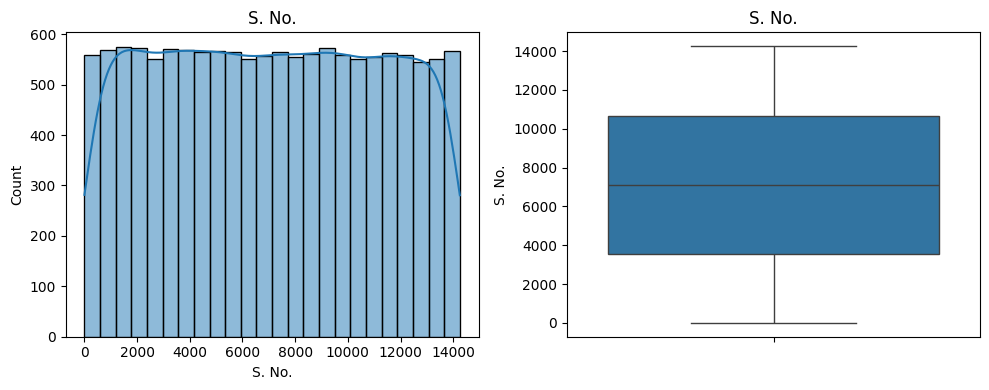

Timestamp
count    13464.000000
mean     42054.841222
std          0.272948
min      42052.004370
25%      42054.716548
50%      42054.800675
75%      42054.932112
max      42058.363750
Name: Timestamp, dtype: float64


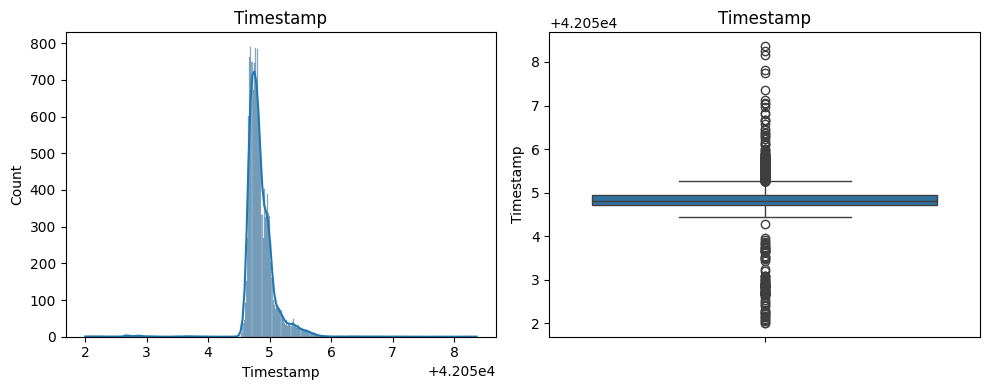

Hours
count    13434.000000
mean        22.247357
std         70.284502
min          0.000000
25%         12.000000
50%         20.000000
75%         28.000000
max       8000.000000
Name: Hours, dtype: float64


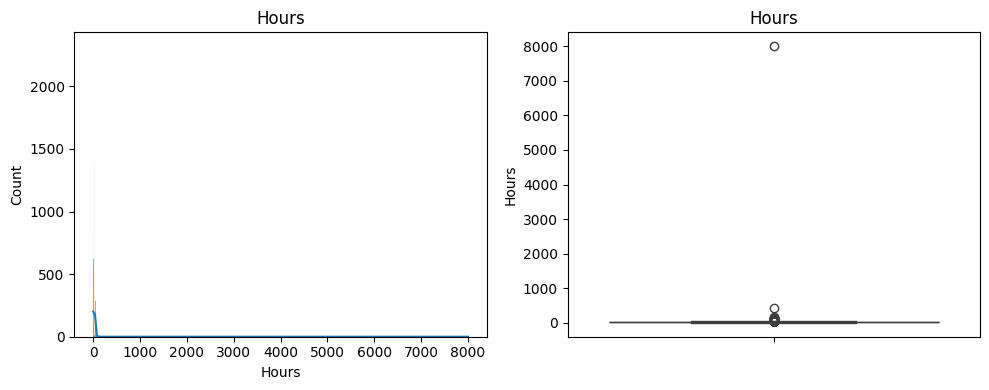

highestleague
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: highestleague, dtype: float64


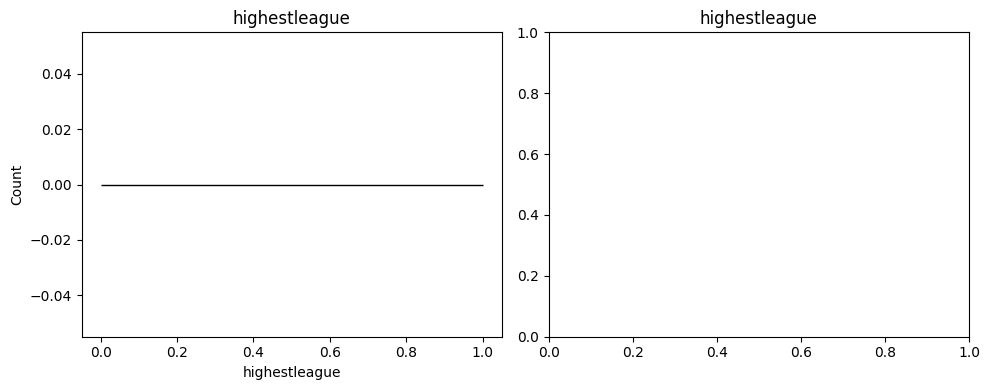

streams
count    13364.000000
mean        11.233538
std         78.549209
min          0.000000
25%          4.000000
50%          8.000000
75%         15.000000
max       9001.000000
Name: streams, dtype: float64


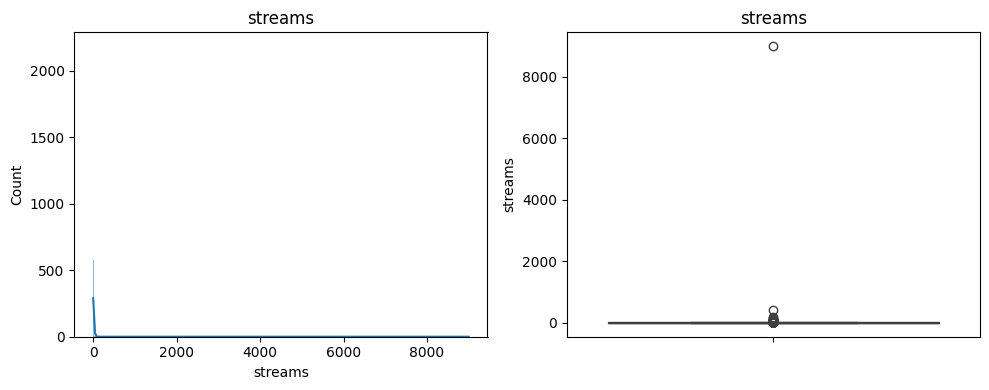

Age
count    13464.000000
mean        20.930407
std          3.300897
min         18.000000
25%         18.000000
50%         20.000000
75%         22.000000
max         63.000000
Name: Age, dtype: float64


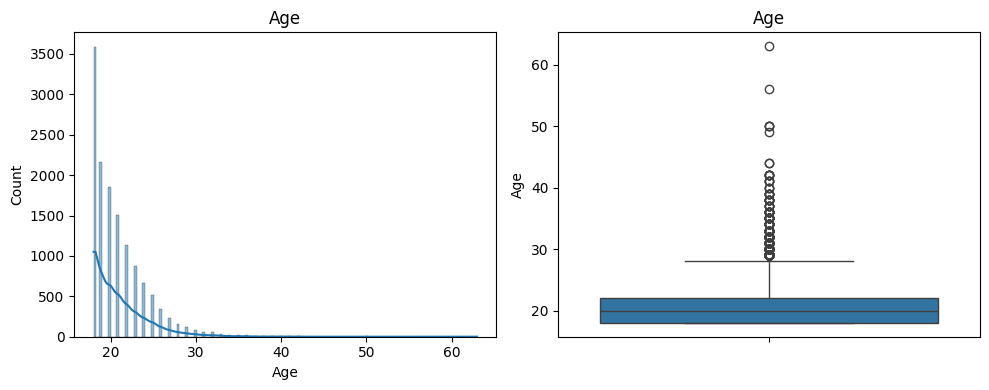

GAD_T
count    13464.000000
mean         5.211973
std          4.713267
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         21.000000
Name: GAD_T, dtype: float64


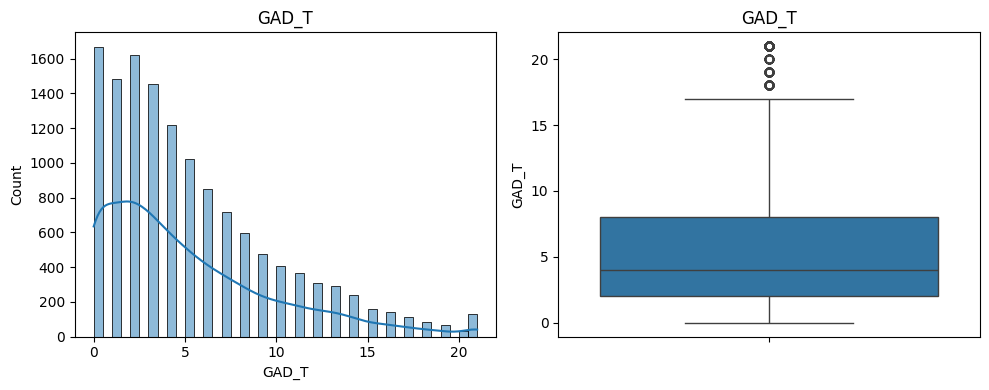

SWL_T
count    13464.000000
mean        19.788844
std          7.229243
min          5.000000
25%         14.000000
50%         20.000000
75%         26.000000
max         35.000000
Name: SWL_T, dtype: float64


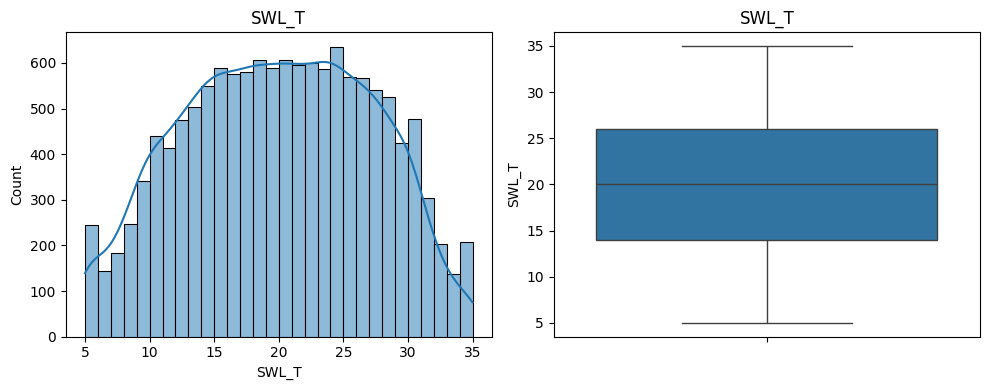

SPIN_T
count    12814.000000
mean        19.848525
std         13.467493
min          0.000000
25%          9.000000
50%         17.000000
75%         28.000000
max         68.000000
Name: SPIN_T, dtype: float64


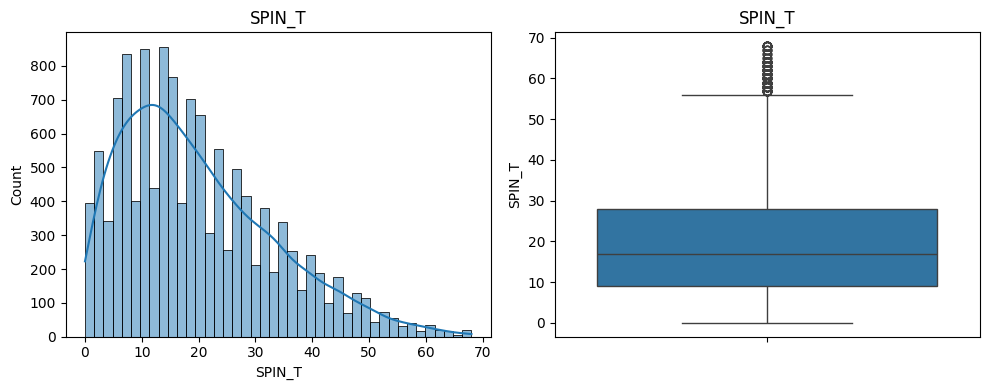

In [6]:
#Per cada variable numèrica, mirem la distribució de les dades i fem un boxplot
for variable in variables_numeriques:
    print(variable)
    print(data[variable].describe())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Histograma
    sns.histplot(data[variable], kde=True, ax=ax1)
    ax1.set_title(variable)

    # Boxplot
    sns.boxplot(data=data[variable].dropna(), ax=ax2)
    ax2.set_title(variable)

    plt.tight_layout()
    plt.show()

Després d'aplicar aquesta primera ànalisi de dades podem adonar-nos que la variable S.No és en realitat un comptador o índex de la fila, per tant, és una variable que no ens interessa en la nostra anàlisi. 

Analitzant la base de dades vam observar com Timestamp tampoc ens aporta informació significativa. 

Per altra banda, a la variable 'Hours' i 'streams' podem trobar outliers importants que fan que no es puguin interpretar correctament les varaibles. 

També podem observar que la variable 'highestleague' conté masses valors mancants. 

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


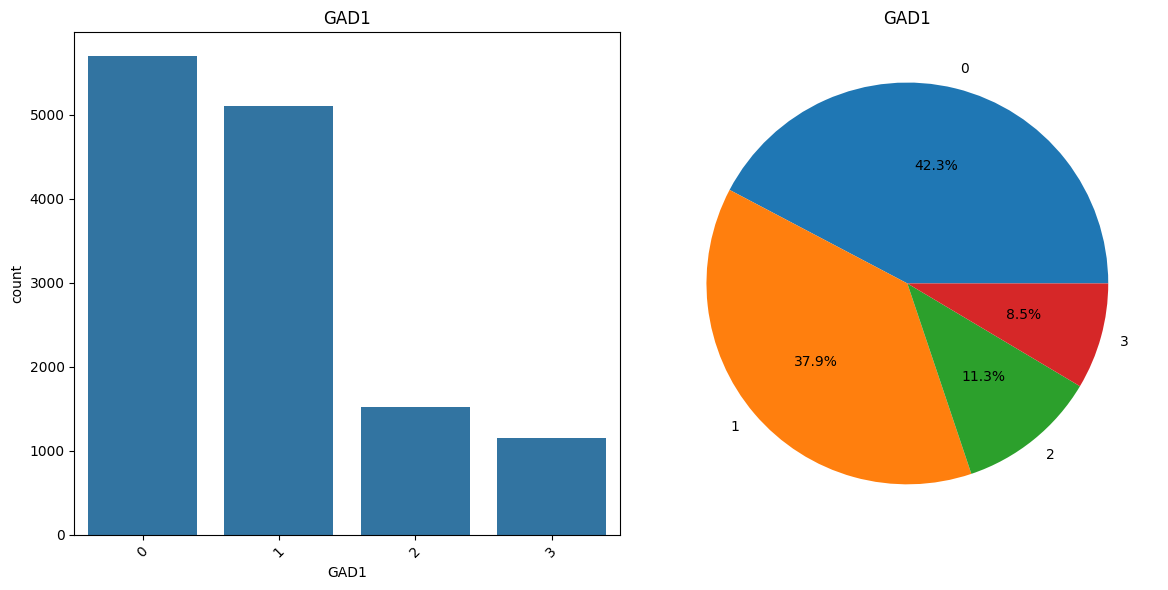

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


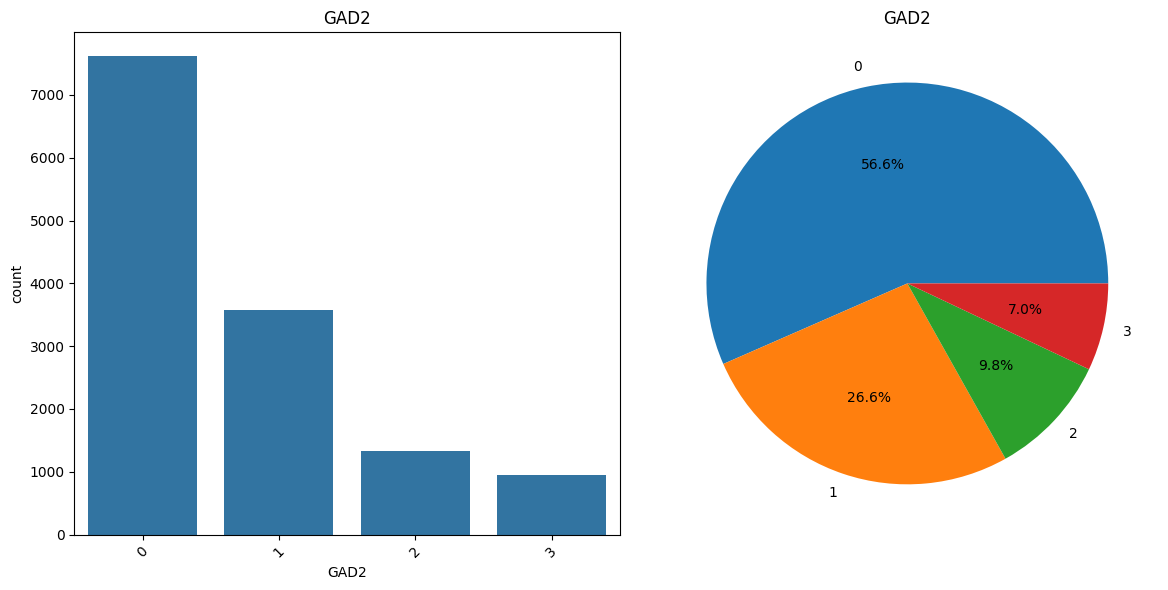

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


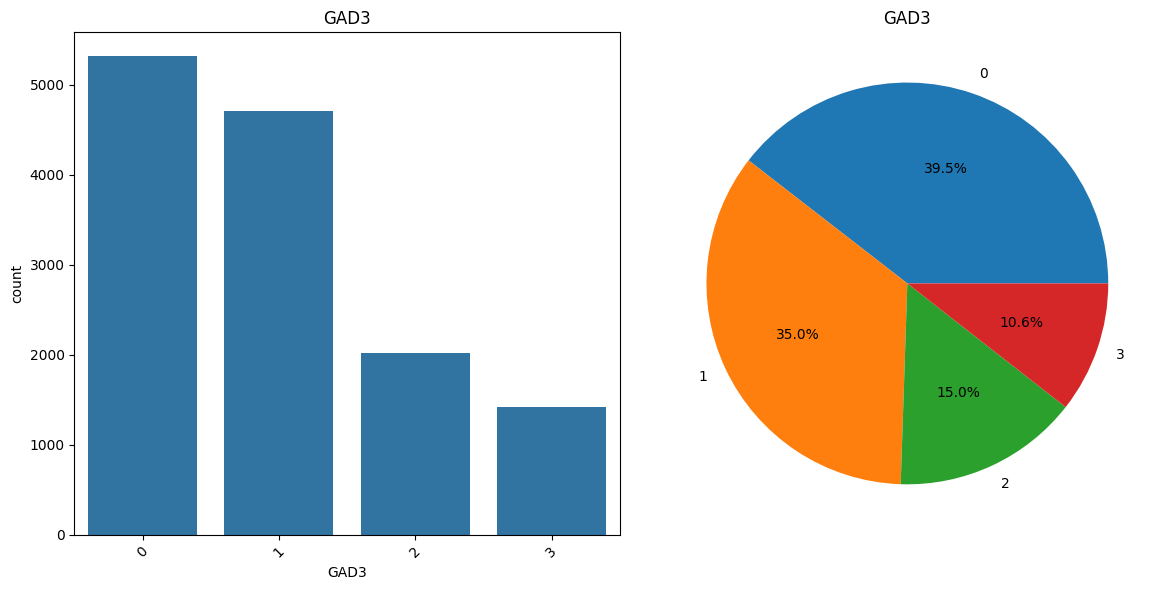

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


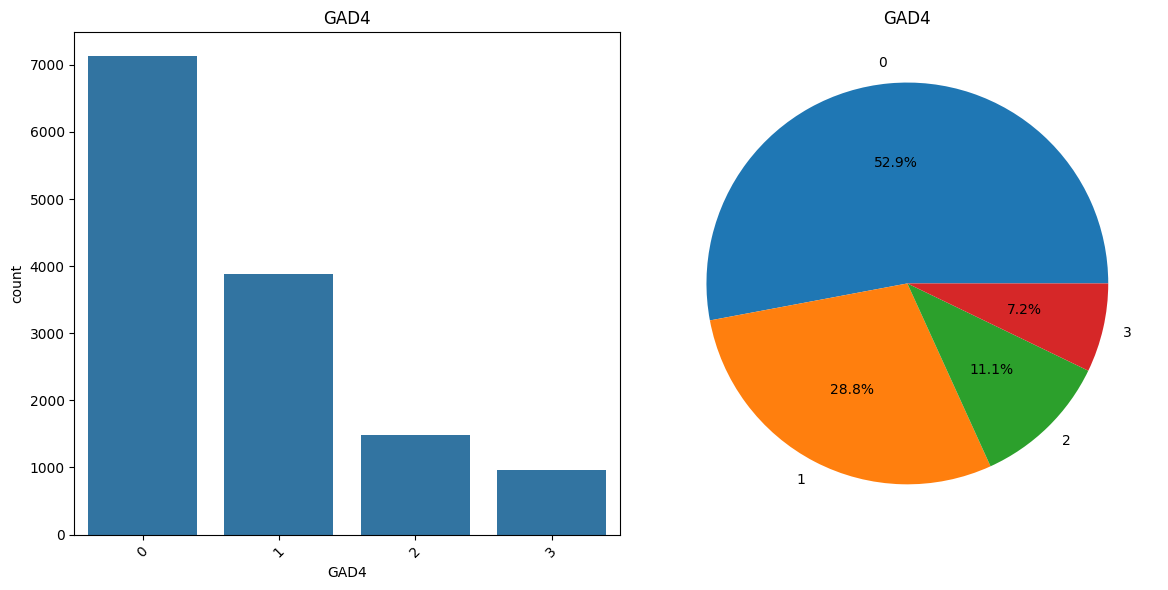

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


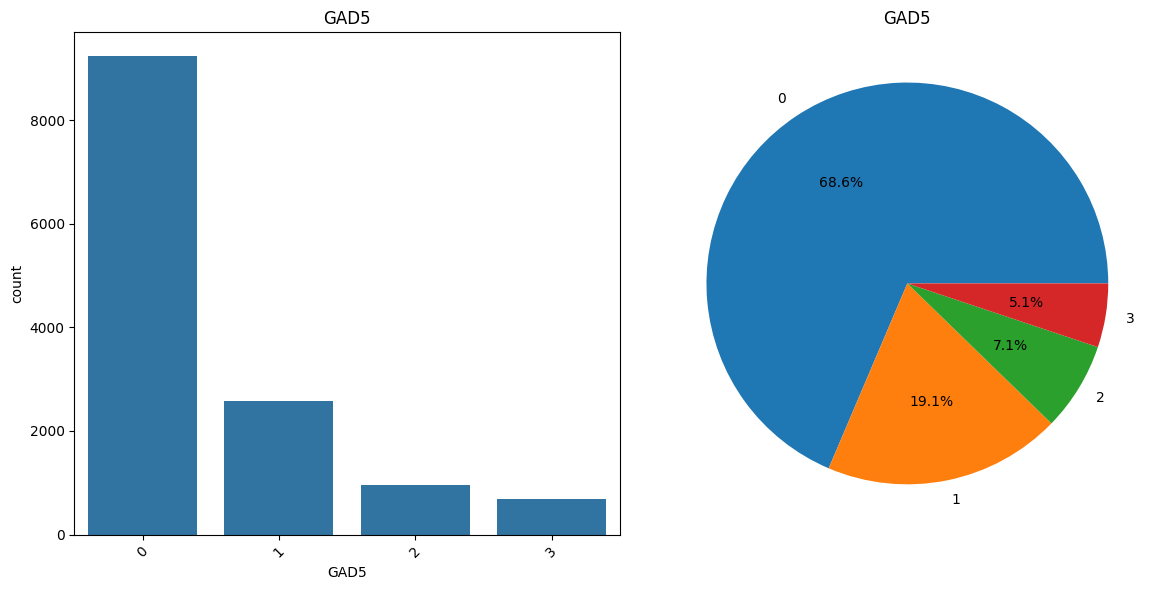

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


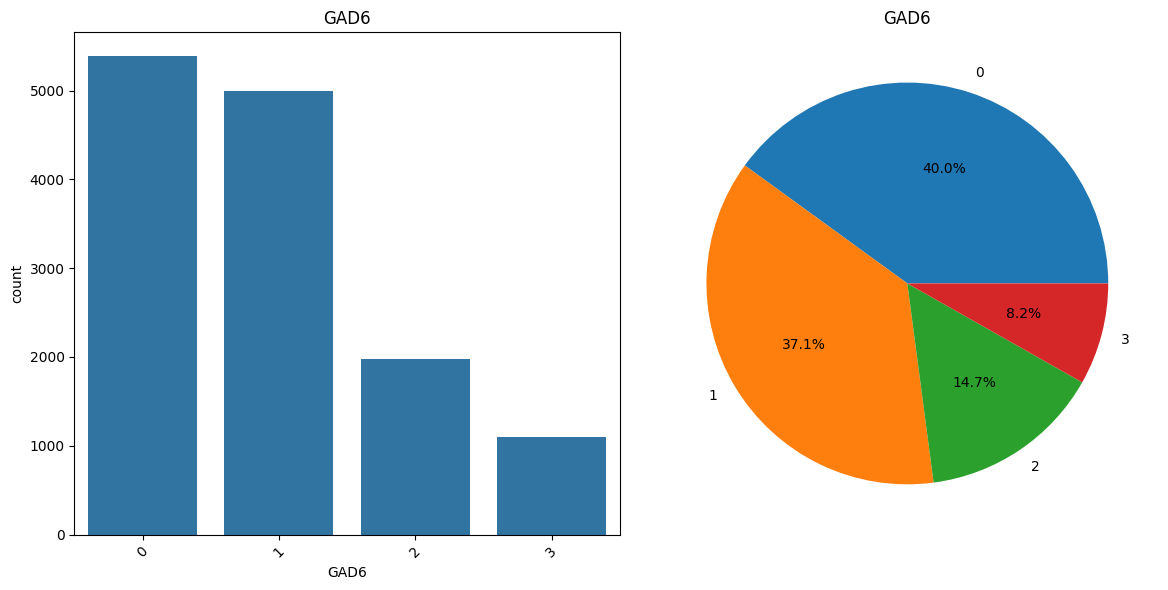

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


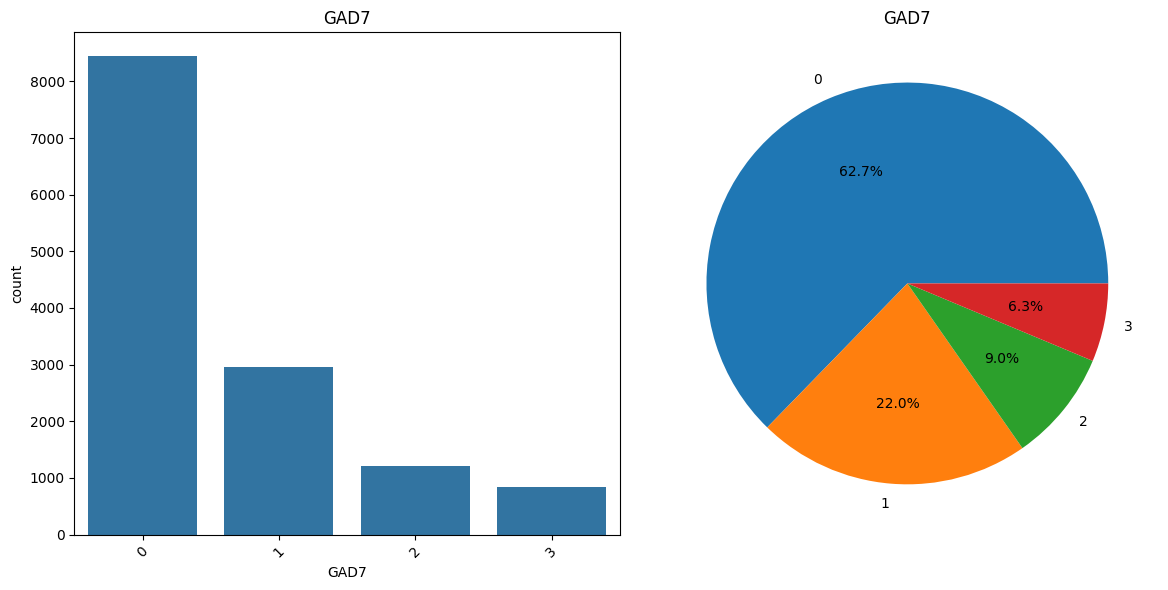

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


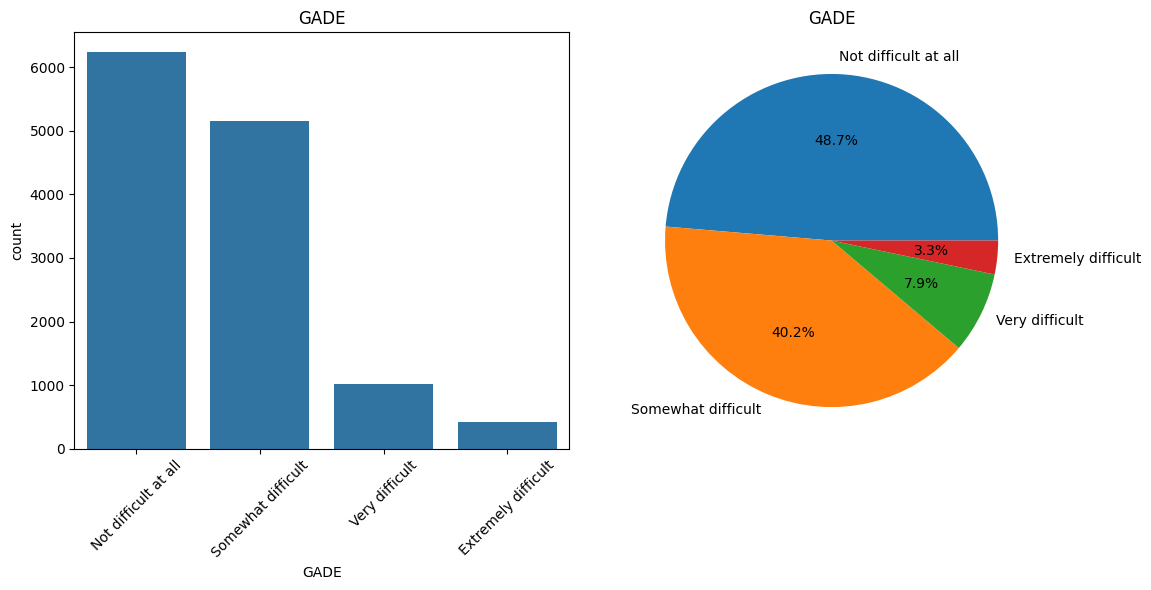

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


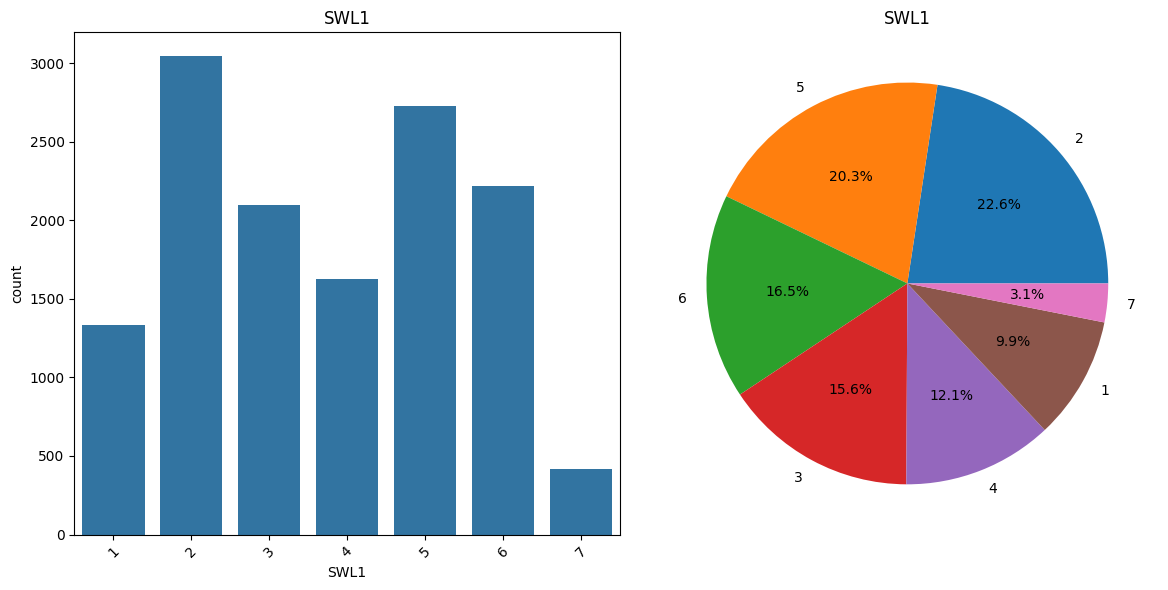

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


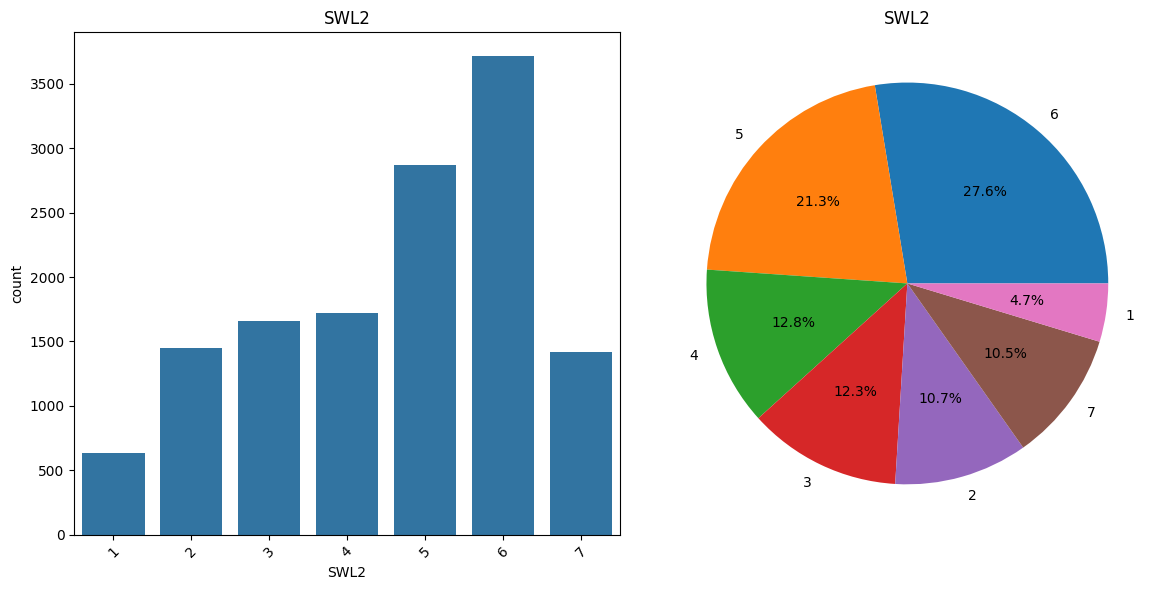

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


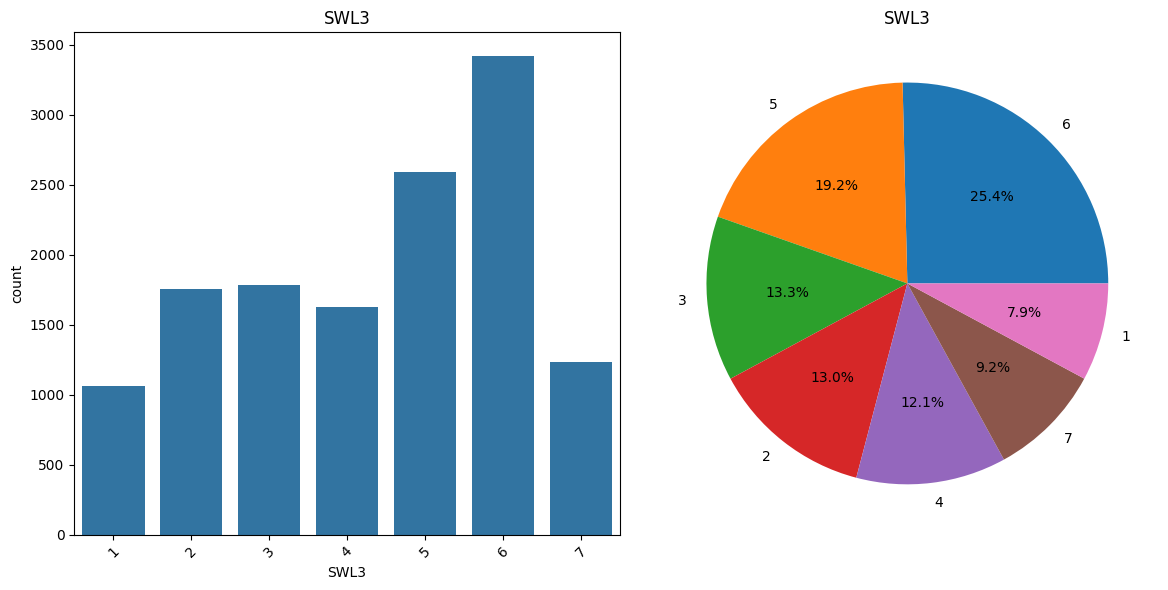

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


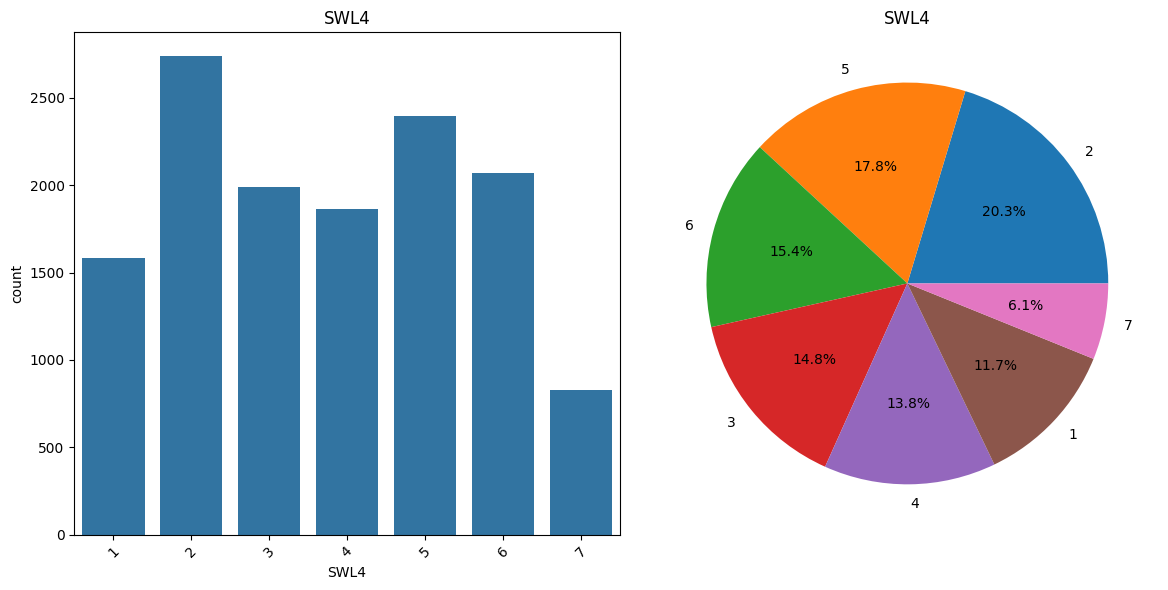

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


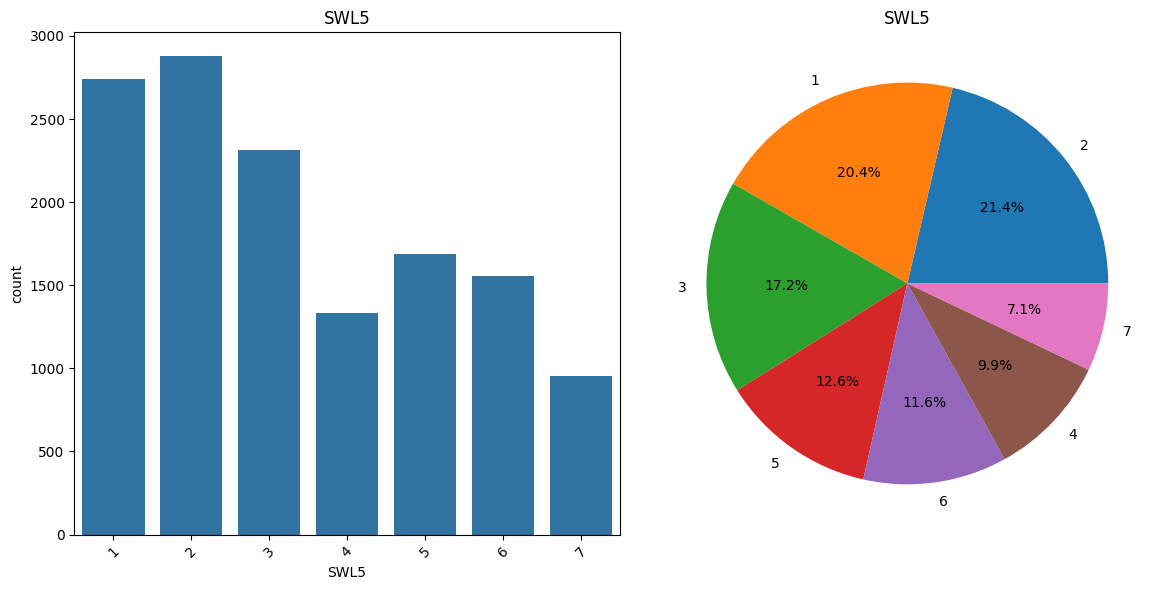

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


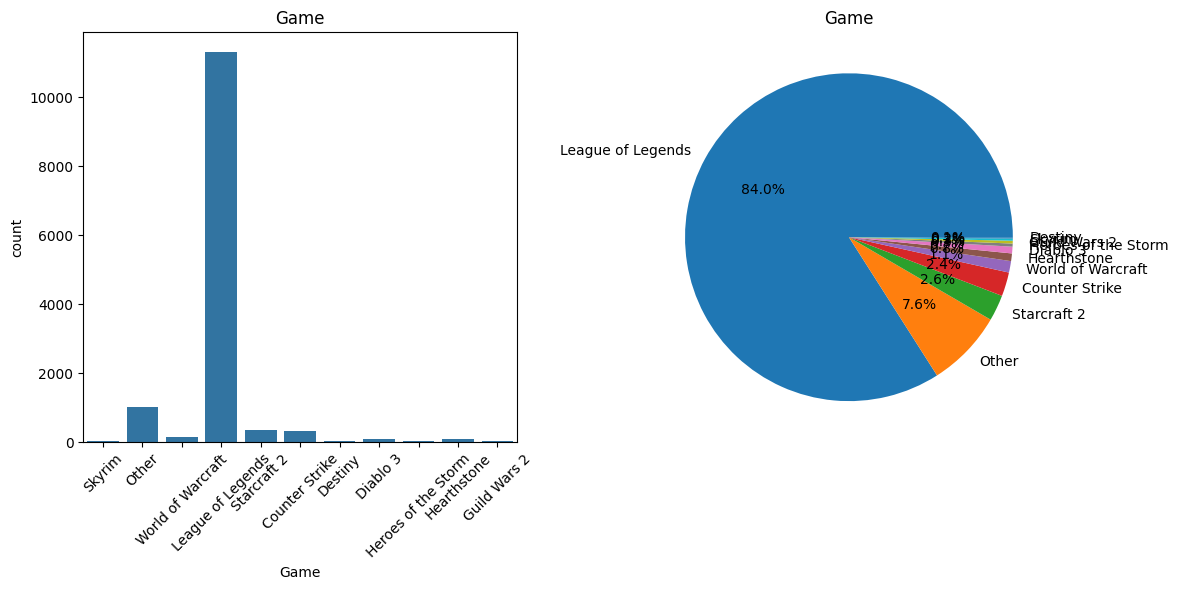

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


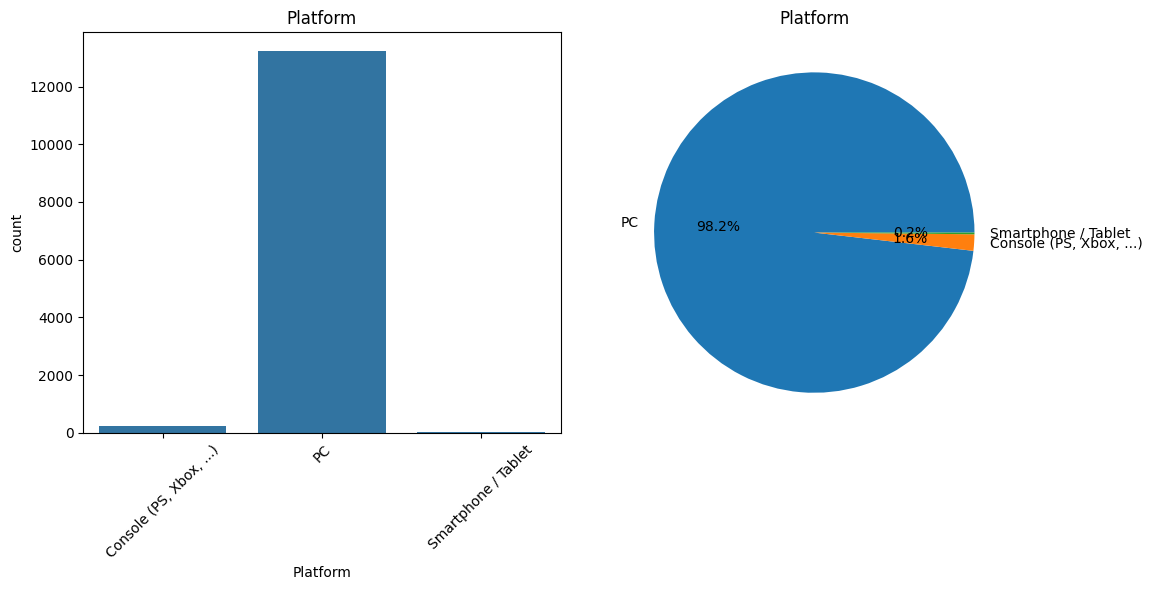

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x
/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


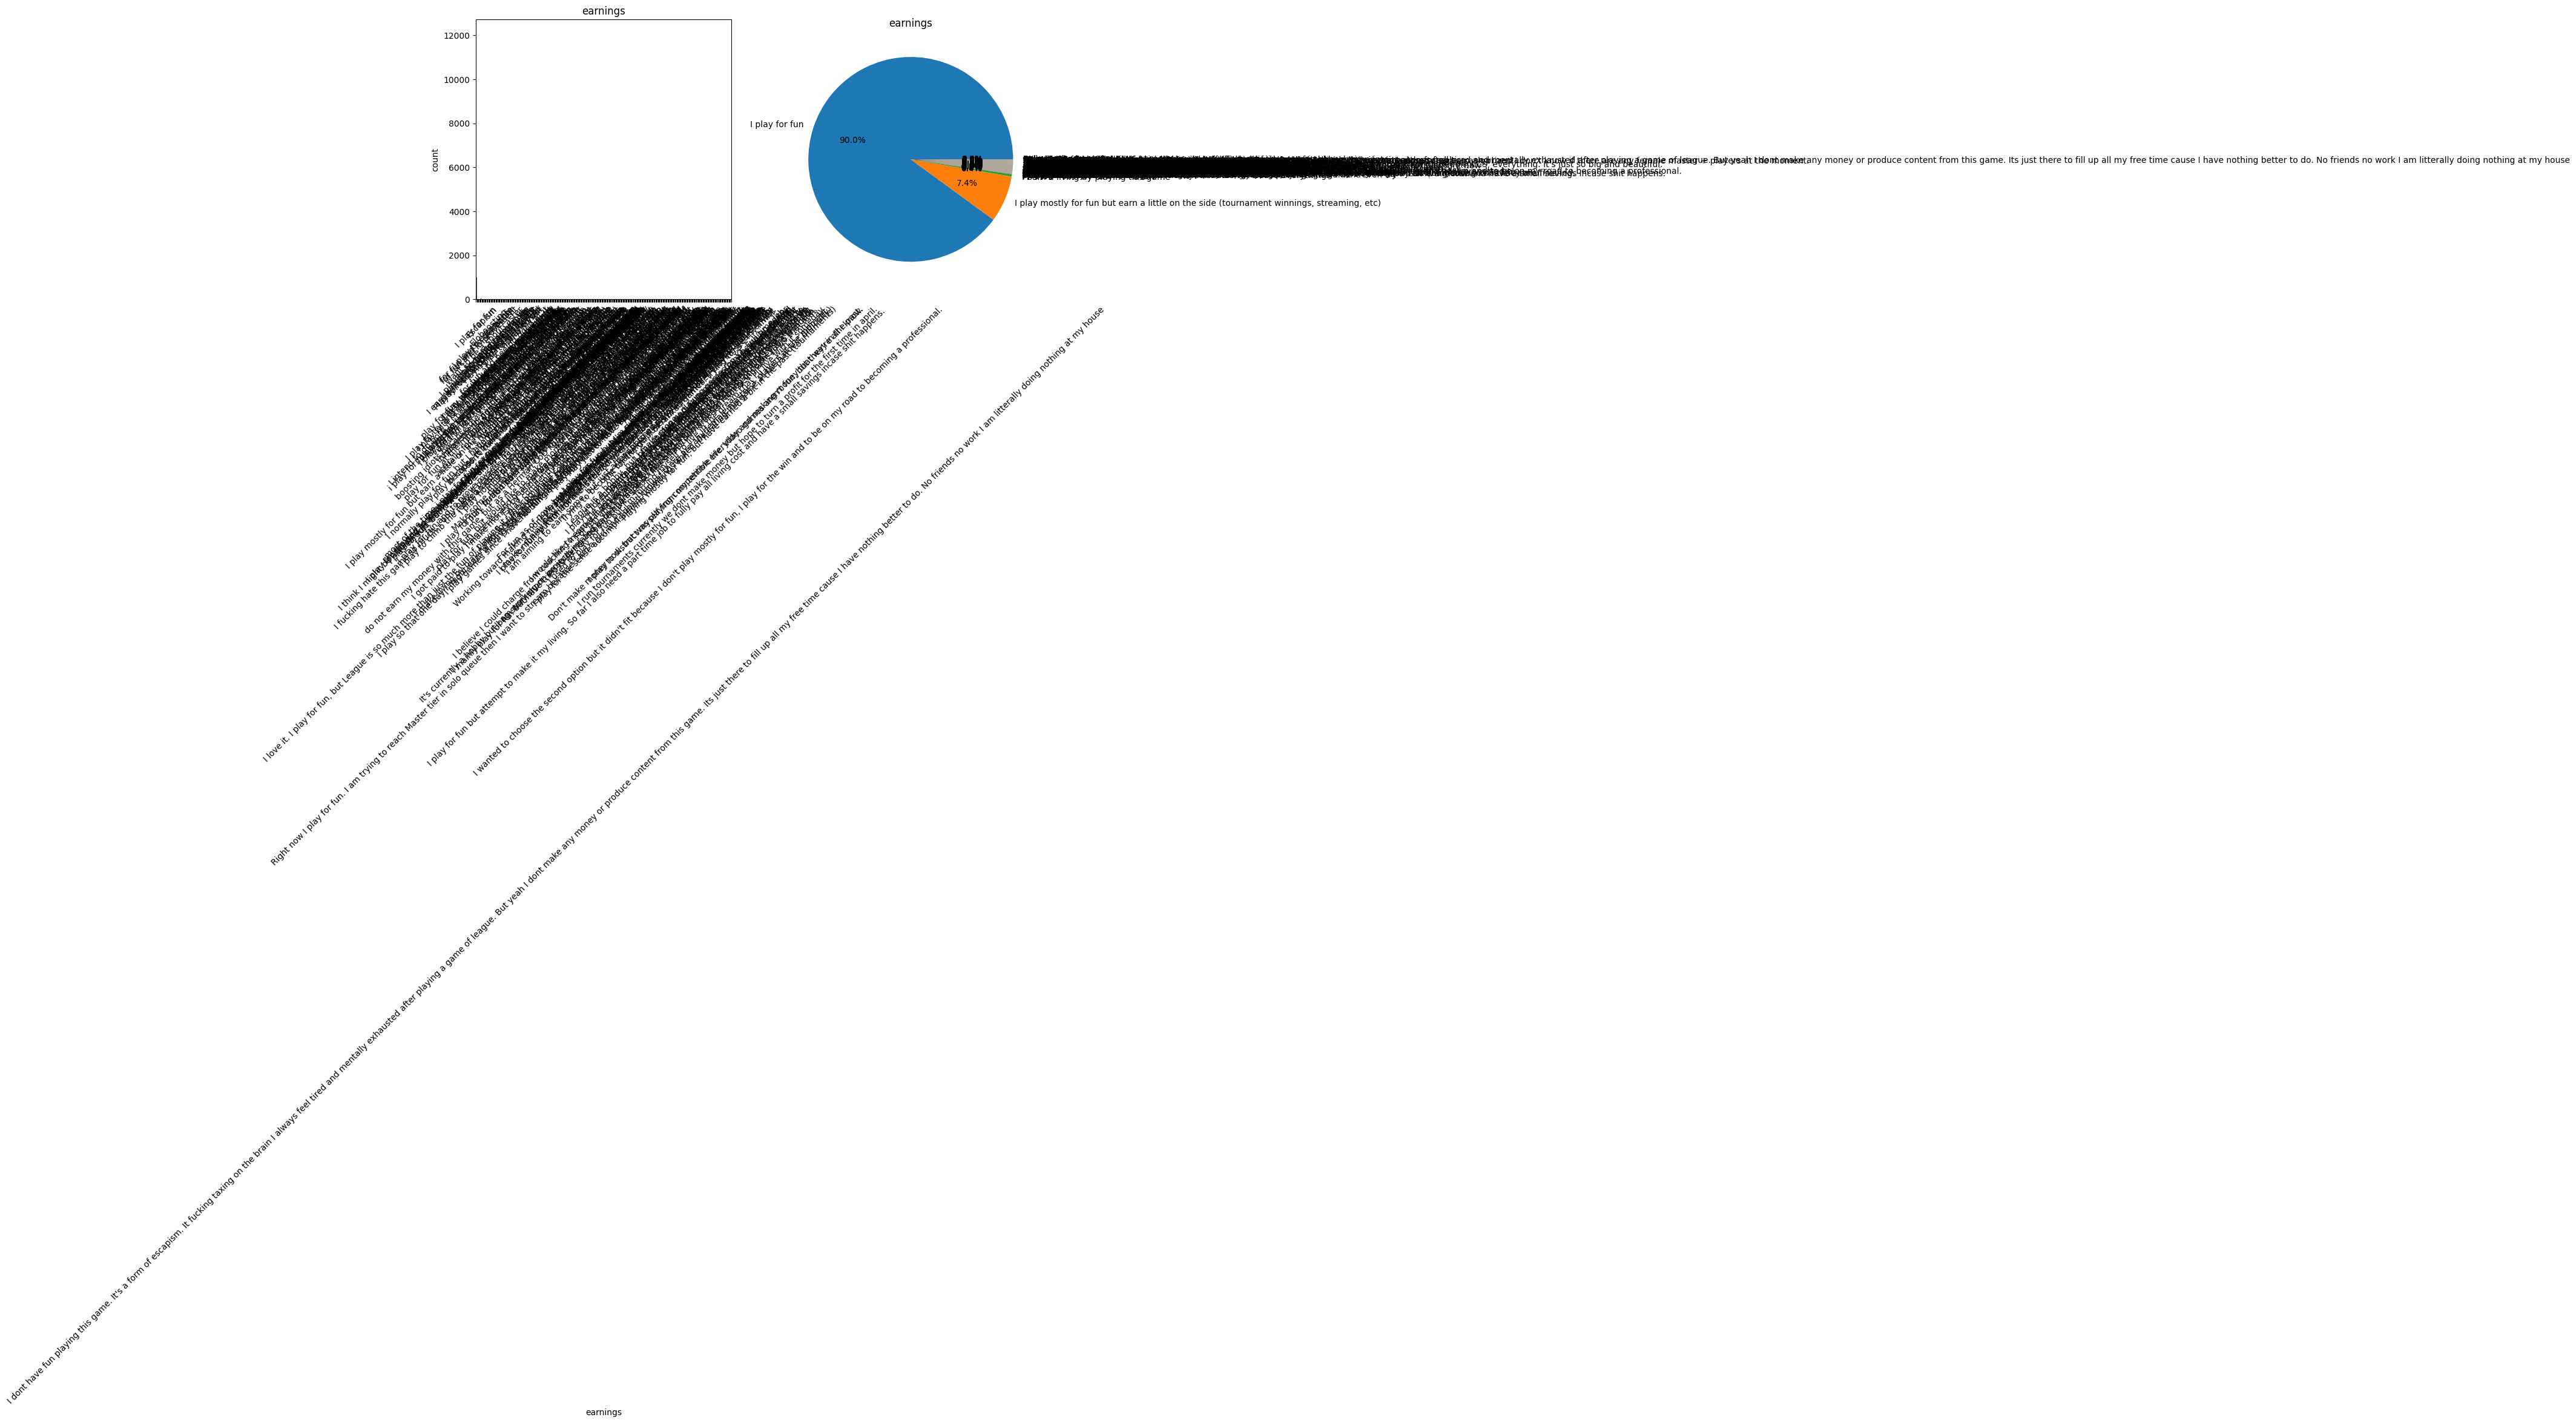

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x
/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


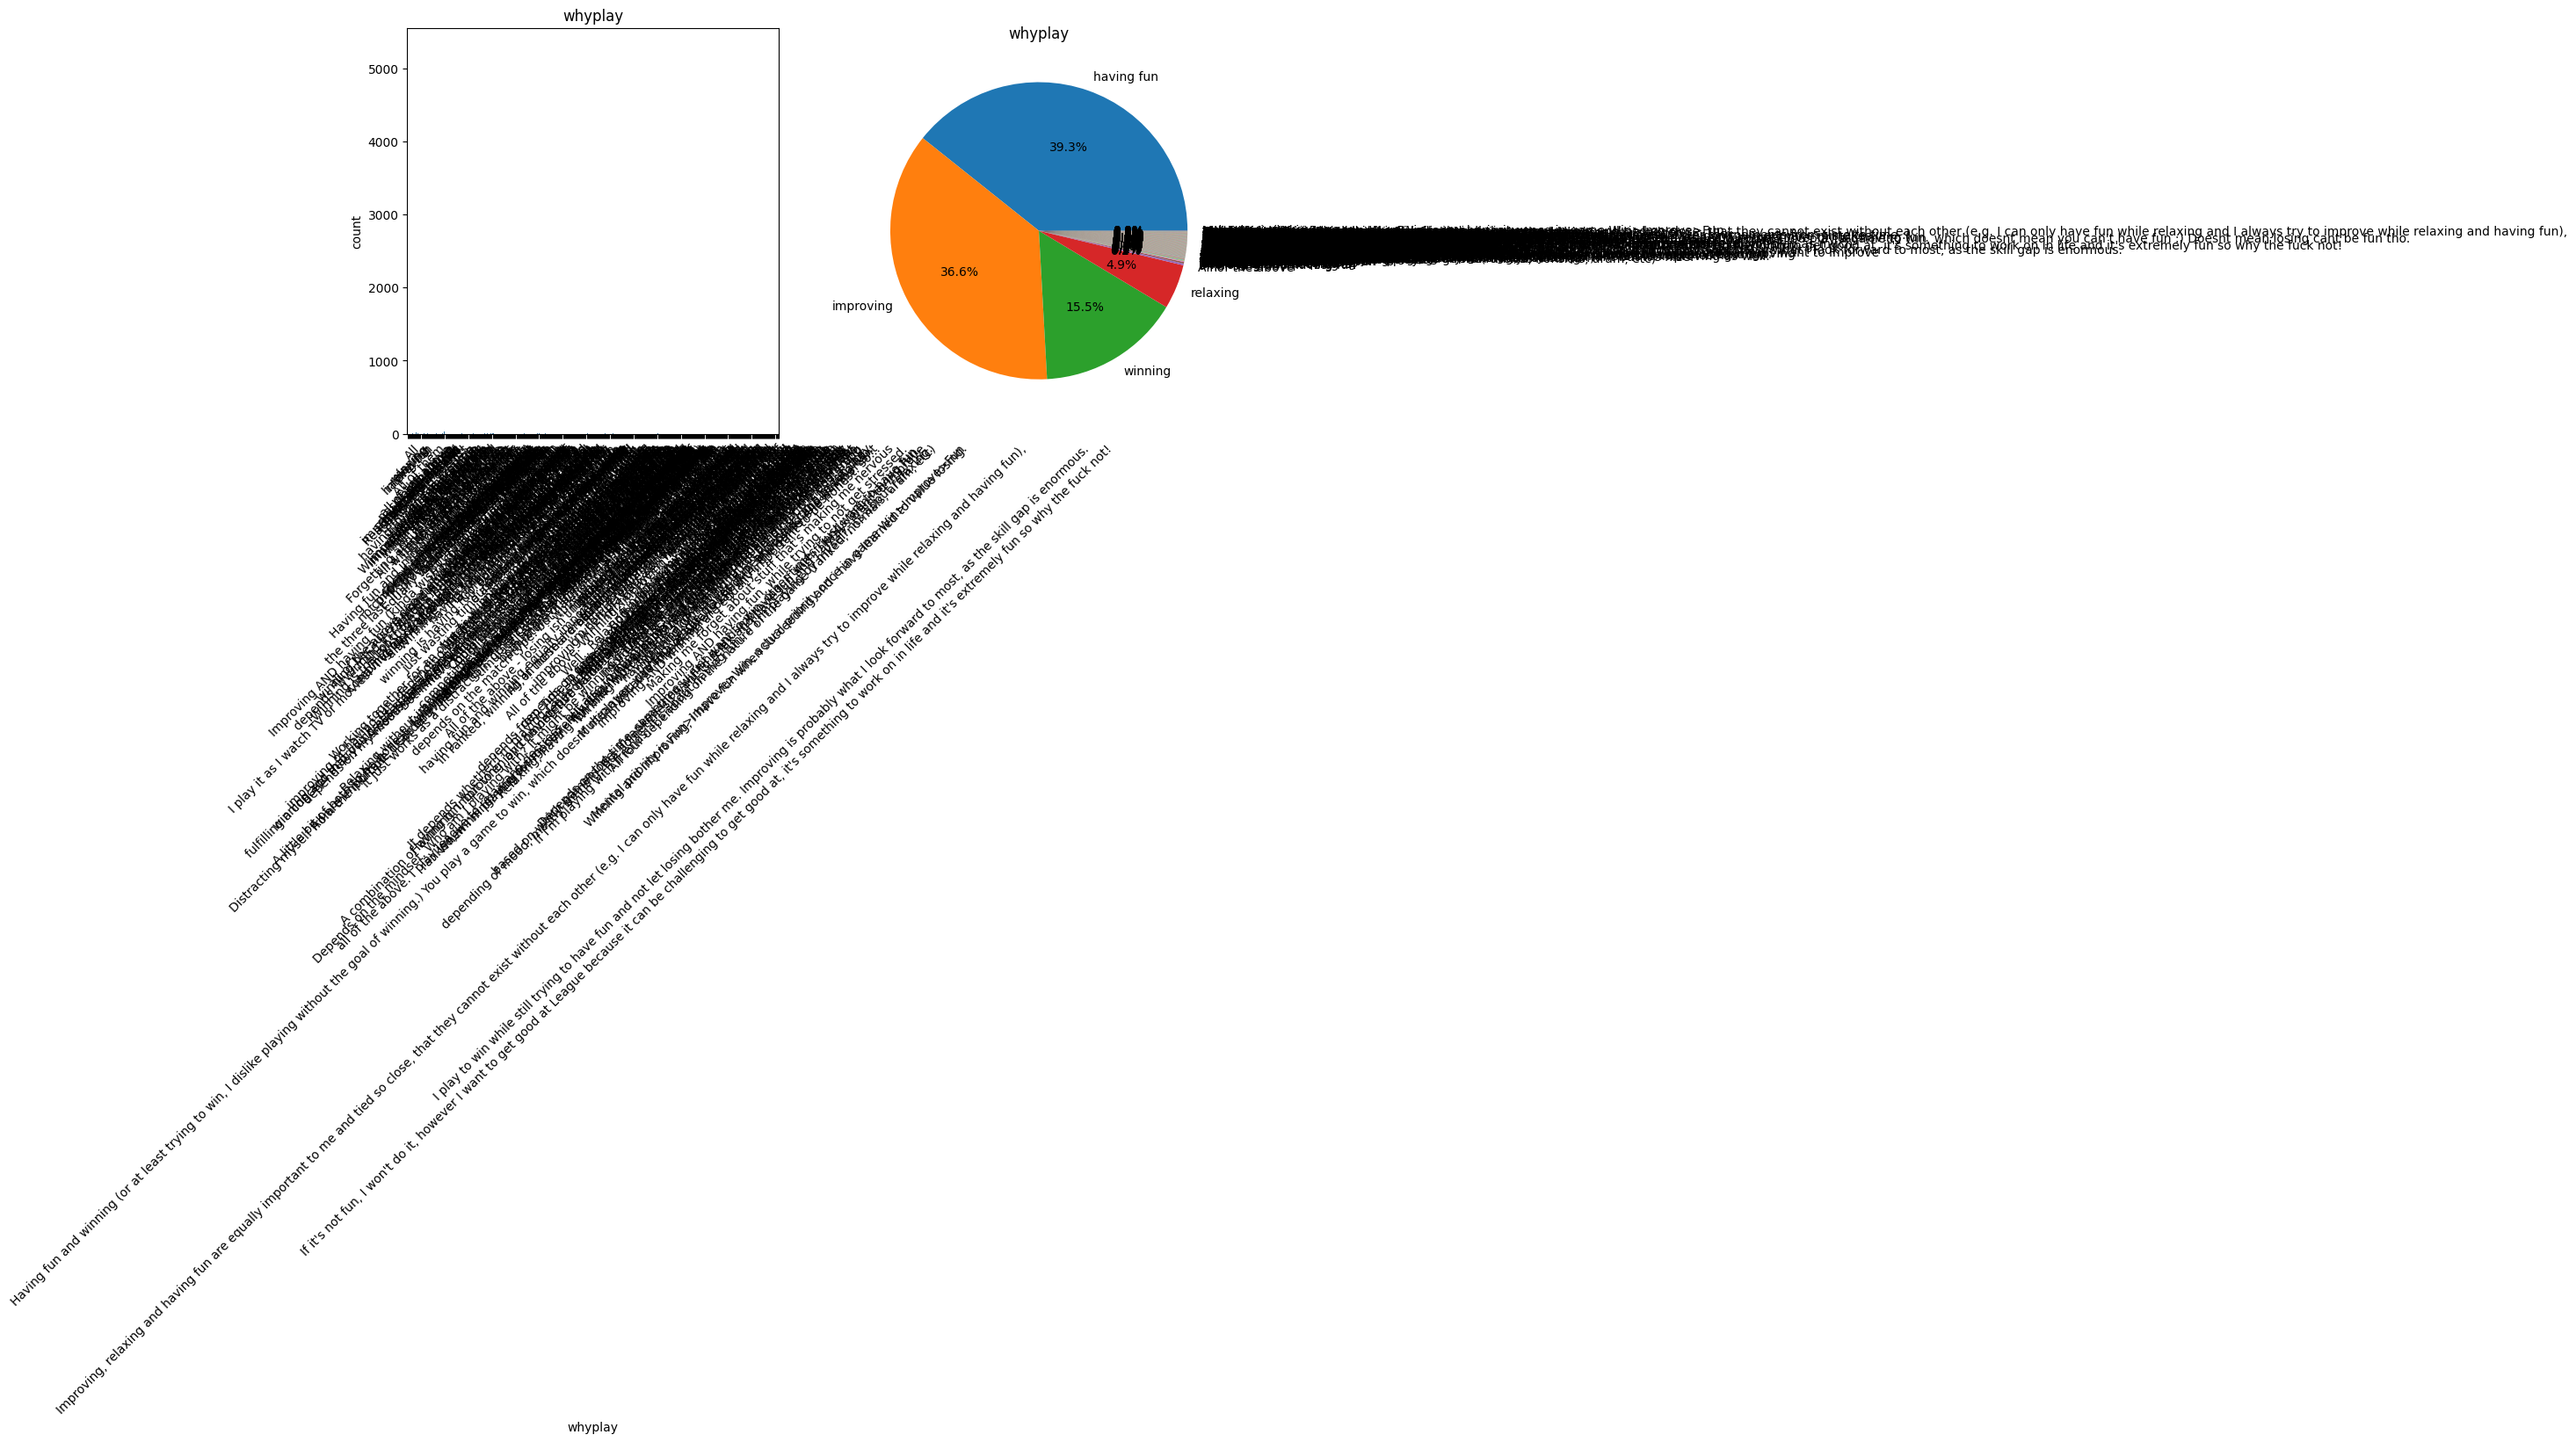

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x
/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gibertantentas/.pyenv/versions/3.11.5/envs/IAA/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_14925/1580787541.py", line 17, in <module>
    plt.show()
  File "/Users/gibertantentas/.pyenv/versions/3.11.5/envs/IAA/lib/python3.11/site-packages/matplotlib/pyplot.py", line 527, in show
    return _get_backend_mod().show(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gibertantentas/.pyenv/versions/3.11.5/envs/IAA/lib/python3.11/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/Users/gibertantentas/.pyenv/versions/3.11.5/envs/IAA/lib/python3.11/site-packages/IPython/core/display_functions.py", line 298, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
                     

In [7]:
#Estudiem les columnes categòriques que té el conjunt de dades dibuixant un countplot i un pieplot

for variable in variables_categoriques:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Countplot
    sns.countplot(data=data, x=variable, ax=ax1)
    ax1.set_title(variable)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x

    # Pieplot
    data[variable].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2)
    ax2.set_title(variable)
    ax2.set_ylabel('')  # Eliminar la etiqueta del eje y en el gráfico de pastel

    plt.tight_layout()
    plt.show()


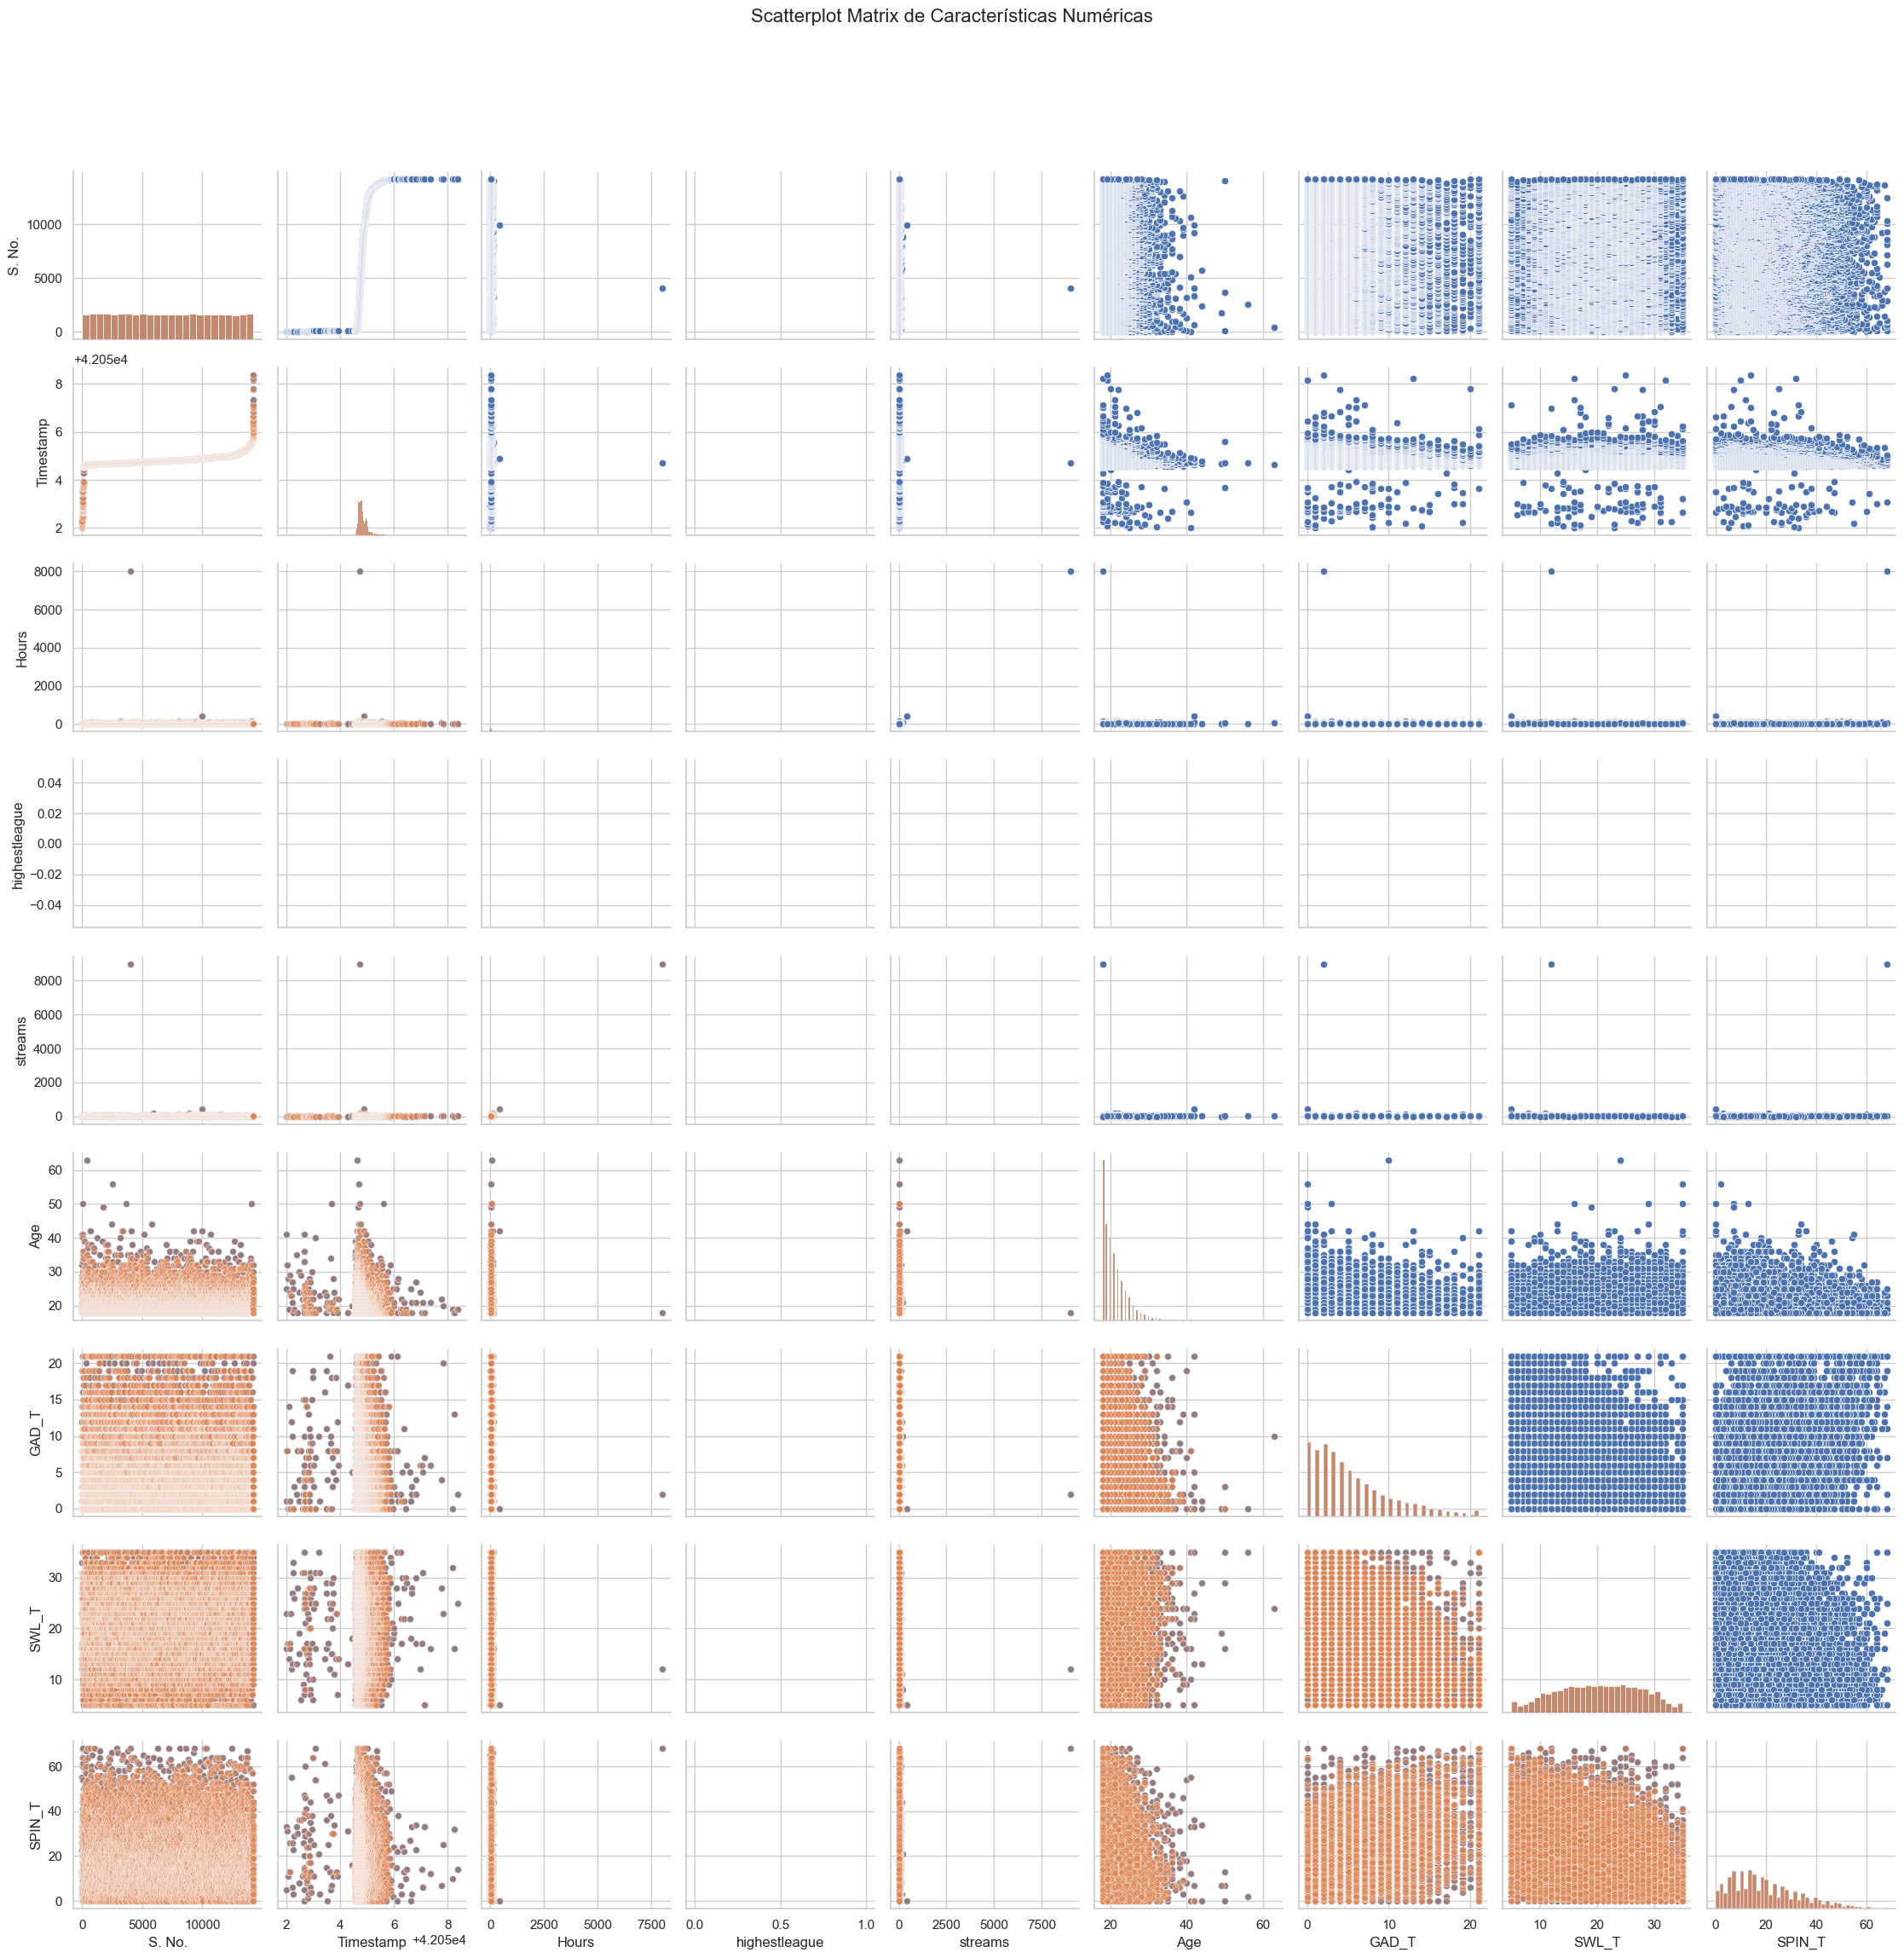

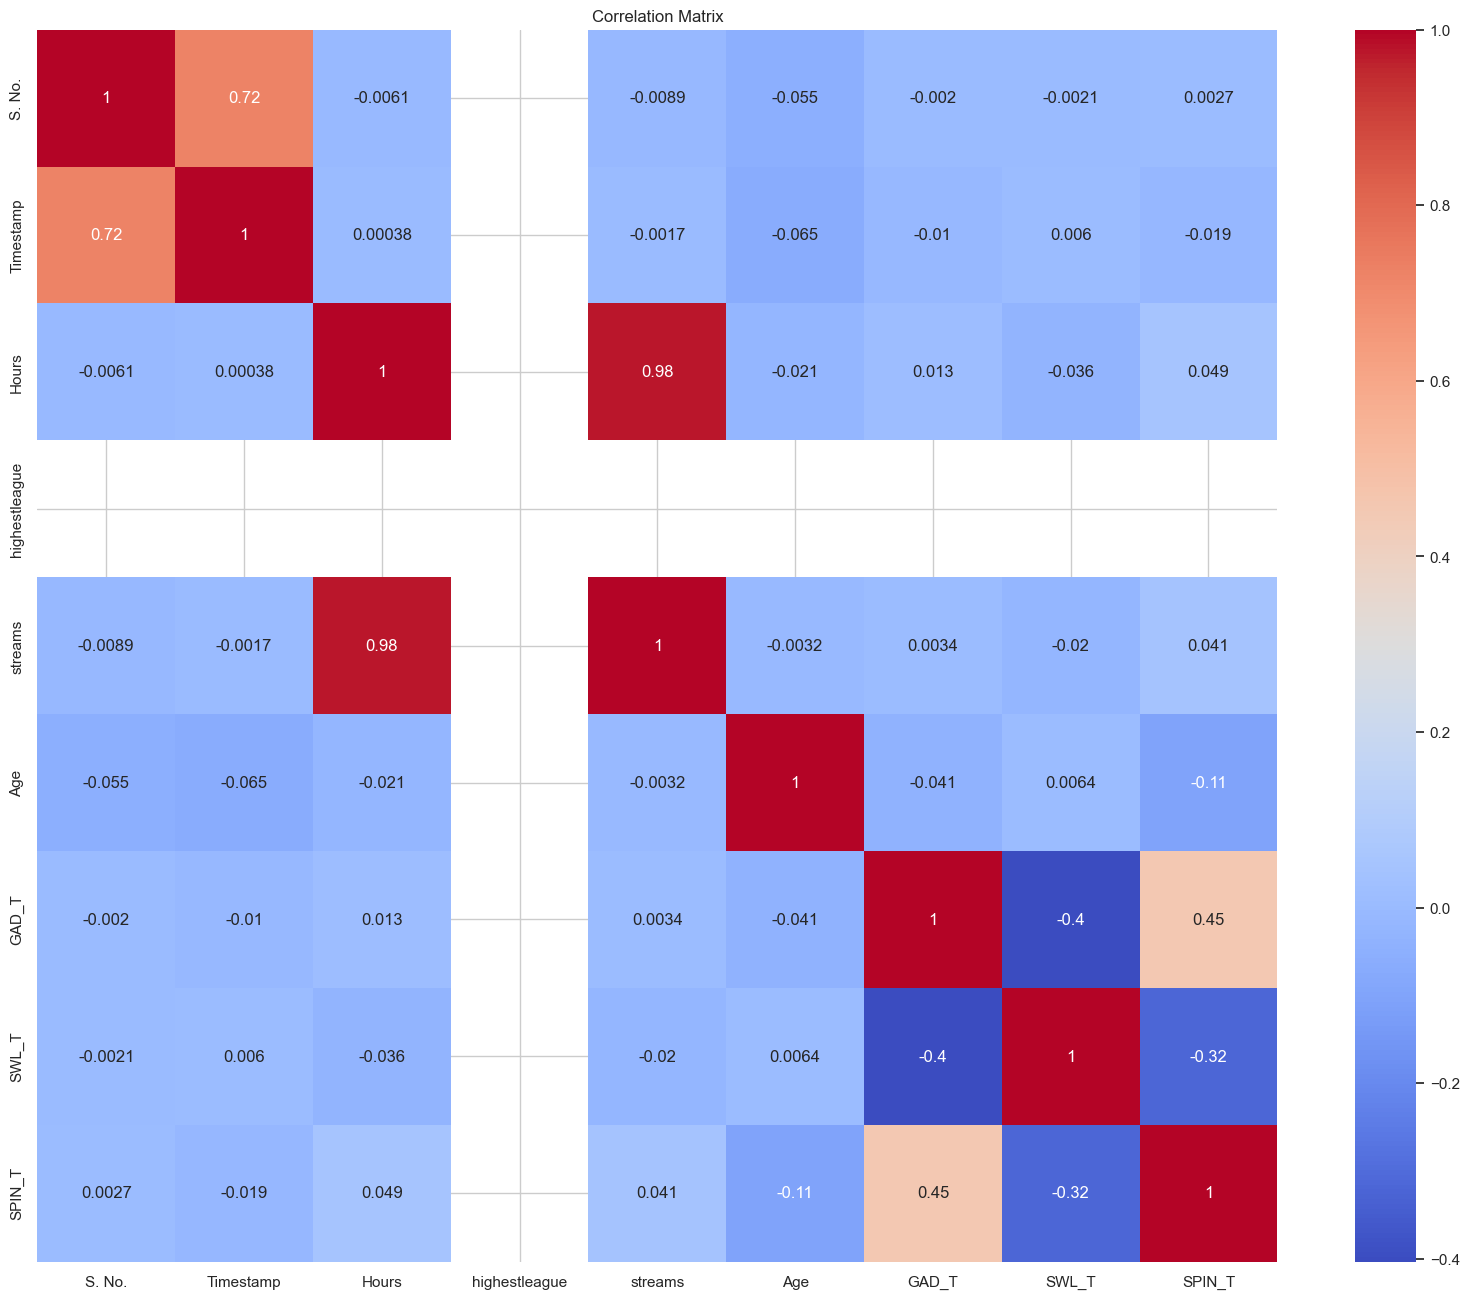

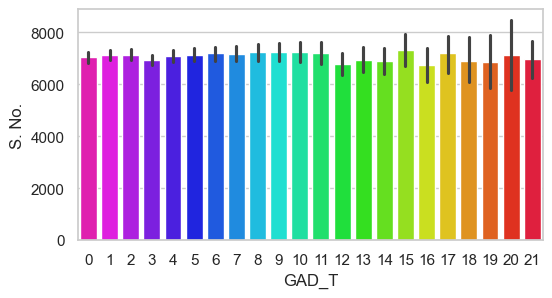

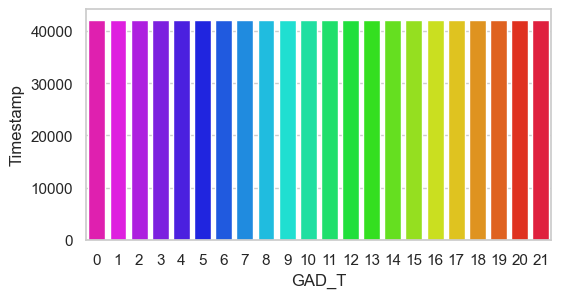

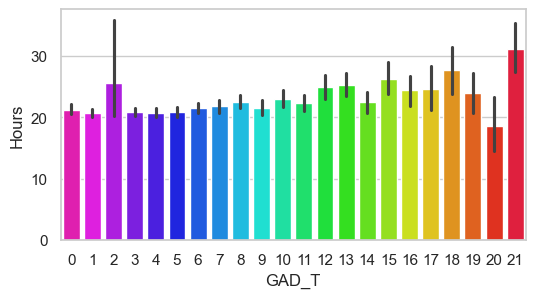

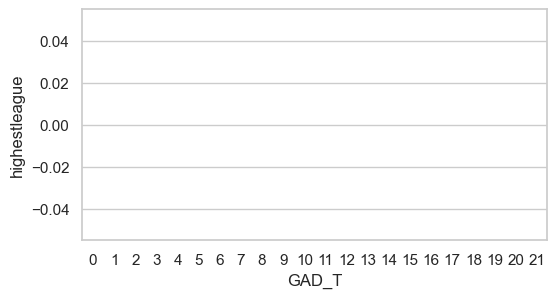

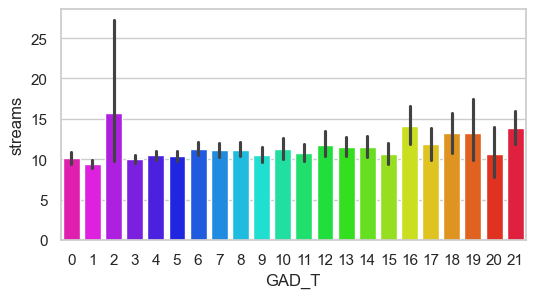

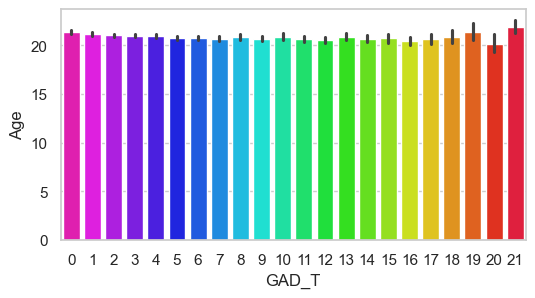

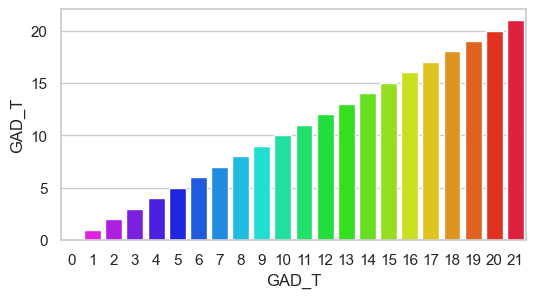

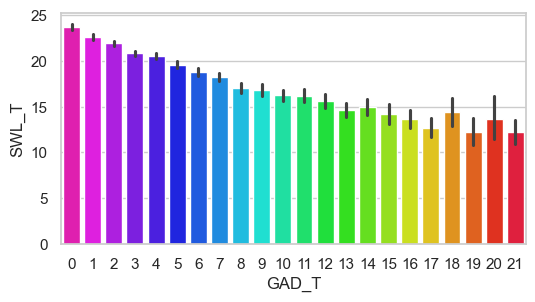

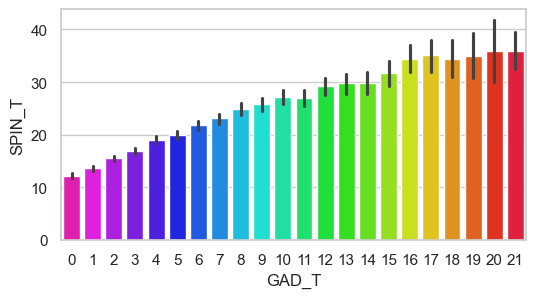

In [ ]:
def study_correlation_numerical_variables(df, num_features, variables_objectius):
    #Correlation between numerical variables
    sns.set(style="whitegrid")
    scatter_matrix = sns.pairplot(df[num_features], height=2.5)

    scatter_matrix.map_lower(sns.scatterplot, alpha=0.5, s=30)

    scatter_matrix.map_diag(sns.histplot)

    scatter_matrix.fig.suptitle("Scatterplot Matrix de Características Numéricas", y=1.02, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  

    plt.show()
    
    # Calculate correlation matrix
    correlation_matrix = df[num_features].corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(20, 16))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    #Plotting the barplot of numerical features
    # Plotting the barplot of numerical features
    for col in num_features:
        for var_obj in variables_objectius:
            plt.figure(figsize=(6,3), dpi=100)
            sns.barplot(data=df, x=var_obj, y=col, hue=var_obj, palette='gist_rainbow_r', legend=False)


study_correlation_numerical_variables(data, variables_numeriques, ['GAD_T'])

In [ ]:
'''def study_correlation_categorical_variables(df, cat_features, var_objectiu):
    # Correlation between categorical variables
    for col in cat_features[:-1]:
        for var in var_objectiu:
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=col, hue=var, palette='gist_rainbow_r')
            plt.legend(loc='upper right')
            plt.title(f'{col} vs {var}')
            plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para evitar superposición
            plt.show()

    def correlation_cat(dataframe, cat_features):
        # Generate all combinations of pairs of categorical variables
        cat_combinations = list(combinations(cat_features, 2))

        # Plot correlation matrix for each pair
        for pair in cat_combinations:
            correlation_matrix = pd.crosstab(dataframe[pair[0]], dataframe[pair[1]])

            # Plot correlation matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='d')
            plt.title(f'Correlation Matrix - {pair[0]} vs {pair[1]}')
            plt.show()

    correlation_cat(df, cat_features)

study_correlation_categorical_variables(data, variables_categoriques, ['GAD_T'])
'''

"def study_correlation_categorical_variables(df, cat_features, var_objectiu):\n    # Correlation between categorical variables\n    for col in cat_features[:-1]:\n        for var in var_objectiu:\n            plt.figure(figsize=(8, 6))\n            sns.countplot(data=df, x=col, hue=var, palette='gist_rainbow_r')\n            plt.legend(loc='upper right')\n            plt.title(f'{col} vs {var}')\n            plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para evitar superposición\n            plt.show()\n\n    def correlation_cat(dataframe, cat_features):\n        # Generate all combinations of pairs of categorical variables\n        cat_combinations = list(combinations(cat_features, 2))\n\n        # Plot correlation matrix for each pair\n        for pair in cat_combinations:\n            correlation_matrix = pd.crosstab(dataframe[pair[0]], dataframe[pair[1]])\n\n            # Plot correlation matrix\n            plt.figure(figsize=(8, 6))\n            sns.heatmap(correlation

Observant les variables categòriques podem observar com les variables earning, Reference, Birthplace, whyplay, Playstyle, Residence_ISO3, Birthplace_ISO3 i League. 

Per altra banda, la varaible accept conté només una variable i vam considerar que davant del desbalanceig de les variables 'Platform' on gairebé totes les variables són de PC, igual que en el cas de Reference. 

També observem un desbalanceig important en el cas de la variable gender, també trobem un desbalanceig important. 

**PREPROCESSAMENT**

In [ ]:
#Mirem quants valors únics conté la varaible S.No
print('Valors únics de S.No', data['S. No.'].nunique())

#Mirem quants valors únics contenen les variables earnings, whyplay, League, Birthpalce, Residence, Playstyles, Residence_ISO3, Birthplace_ISO3
for variable in ['earnings', 'whyplay', 'League', 'Birthplace', 'Residence', 'Playstyle', 'Residence_ISO3', 'Birthplace_ISO3']:
    print('Valors únics de', variable, data[variable].nunique())

Valors únics de S.No 13464
Valors únics de earnings 314
Valors únics de whyplay 407
Valors únics de League 1454
Valors únics de Birthplace 126
Valors únics de Residence 109
Valors únics de Playstyle 298
Valors únics de Residence_ISO3 107
Valors únics de Birthplace_ISO3 124


In [ ]:
#mirem els missings de la variable highestleague
print('Missings de highestligue:', data['highestleague'].isnull().sum())

Missings de highestligue: 13464


Decidim eliminar la variable S.No. ja que no aporta informació a la base de dades sinó que simplement és l'índex de la fila. 

Podem observar com la variable 'highestligue és tot valors faltants, per tant, eliminem la varaible. 

També eliminem la variable 'accept', 'platform' i 'Reference'. 

Per altra banda, les variables 'Residence_ISO3' i 'Birthplace_ISO3' no ens aporten nou coneixament a la base de dades, ja que ja tenim les variables 'Residence' i 'Birthplace'

In [ ]:
data = data.drop(['accept', 'highestleague', 'S. No.', 'Platform', 'Reference', 'Residence_ISO3','Birthplace_ISO3', 'Timestamp'], axis=1)

Per poder avaluar si les varaiables GADs, SWLs i SPINs són variables rellevants, vam estudiar-ne el seu significat. 

GAD_7 és una tècnica per calcular l'ansietat a través de 7 preguntes. Així doncs, cada variable de GAD (GAD1, GAD2 ... GAD7) correspon a una pregunta del test on la resposta és una nombre (enter) de 0 a 3. 
Per altra banda, la variable GAD_T és la suma de totes les preguntes del test. 

El mateix passa en el cas de SWL i SPIN, on SWL calcula la satisfacció amb la vida (Satisfactory With Life) amb un test format per cinc preguntes que van de 1 a 7. SPIN (Social Phobia Inventory) calcula l'ansietat social amb un test de 17 preguntes amb respostes d'entre 0 a 4. 

En els tres casos, vam considerar que només ens interessaven els casos totals ja que són on realment es poden extreure bones conclusions així que vam decidir eliminar tots els GAD1, GAD2,.... ,GAD7, SWL1, ...., SWL5, SPIN1, ... ,SPIN17. 

In [ ]:
#ENS QUEDEM AMB LES COLUMNES QUE ENS INTERESSEN
data = data.drop(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10','SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17'], axis=1)

A més a més, vam decidir transformar aquestes variables en uns rangs més significatius on avaluen l'estat de l'enquestat segons el resultat del sumatori de cada test. 

**GAD_T**:

0-4 : Minimal Anxiety

5-9 : Mild Anxiety

10-14 : Moderate Anxiety  

15 or greater : Severe Anxiety


**SPIN_T**:

0-20 : No social anxiety

21-30 : Mild 

31-40 : Moderate 

41-50 : Severe 

51-68 : Very severe 


**SWL_T**:

5-9 : Extremly dissatisfied

10-14 : Dissatisfied

15-19 : Slightly dissatisfied

20 : Neutral

21-25 : Slightly satisfied

26-30 : Satisfied

31-35 : Extremely satisfied


In [ ]:
import pandas as pd

data.loc[data['GAD_T'].isin([0, 1, 2, 3, 4]), 'GAD_T'] = 'Minimal'
data.loc[data['GAD_T'].isin([5, 6, 7, 8, 9]), 'GAD_T'] = 'Mild'
data.loc[data['GAD_T'].isin([10, 11, 12, 13, 14]), 'GAD_T'] = 'Moderate'
data.loc[data['GAD_T'].isin([15, 16, 17, 18, 19]), 'GAD_T'] = 'Severe'
data.loc[data['GAD_T'].isin([20, 21, 22, 23, 24, 25]), 'GAD_T'] = 'Very severe'


data.loc[data['SPIN_T'].isin(range(21)), 'SPIN_T'] = 'NO'
data.loc[data['SPIN_T'].isin(range(21, 31)), 'SPIN_T'] = 'Mild'
data.loc[data['SPIN_T'].isin(range(31, 41)), 'SPIN_T'] = 'Moderate'
data.loc[data['SPIN_T'].isin(range(41, 51)), 'SPIN_T'] = 'Severe'
data.loc[data['SPIN_T'].isin(range(51, 69)), 'SPIN_T'] = 'Very severe'

data.loc[data['SWL_T'].isin(range(5, 10)), 'SWL_T'] = 'Extremely diss'
data.loc[data['SWL_T'].isin(range(10, 15)), 'SWL_T'] = 'Dissatisfied'
data.loc[data['SWL_T'].isin(range(15, 20)), 'SWL_T'] = 'Slightly diss'
data.loc[data['SWL_T'].isin([20]), 'SWL_T'] = 'Neutral'
data.loc[data['SWL_T'].isin(range(21, 26)), 'SWL_T'] = 'Slightly sat'
data.loc[data['SWL_T'].isin(range(26, 31)), 'SWL_T'] = 'Satisfied'
data.loc[data['SWL_T'].isin(range(31, 36)), 'SWL_T'] = 'Extremely sat'




/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/84447793.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Minimal' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['GAD_T'].isin([0, 1, 2, 3, 4]), 'GAD_T'] = 'Minimal'
/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/84447793.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NO' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['SPIN_T'].isin(range(21)), 'SPIN_T'] = 'NO'
/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/84447793.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Extremely diss' has dtype incompatible with int64, please explicitly cast to a compatible

In [ ]:
paisos_per_grup = {
    "Western Europe": ["Germany", "UK", "Netherlands", "France", "Belgium", "Austria", "Switzerland", "Luxembourg", "Ireland", "Liechtenstein"],
    "Scandinavia and Baltic Countries": ["Sweden", "Denmark", "Norway", "Finland", "Estonia", "Latvia", "Lithuania", "Iceland"],
    "Southern Europe": ["Spain", "Portugal", "Italy", "Greece", "Gibraltar"],
    "Eastern and Balkan Europe": ["Azerbaijan", "Republic of Kosovo", "Georgia", "Poland", "Romania", "Bulgaria", "Hungary", "Czech Republic", "Slovakia", "Croatia", "Serbia", "Slovenia", "Bosnia and Herzegovina", "Montenegro", "Albania", "Macedonia", "Kosovo", "Belarus", "Moldova", "Ukraine"],
    "Nordic Countries": ["Greenland", "Iceland", "Norway", "Sweden", "Finland", "Denmark", "Faroe Islands"],
    "North America": ["USA", "Canada"],
    "Latin America": ["Curaçao", "Guadeloupe", "St Vincent", "Brazil", "Argentina", "Mexico", "Chile", "Venezuela", "Colombia", "Peru", "Ecuador", "Uruguay", "Bolivia", "Paraguay"],
    "East Asia": ["Mongolia", "China", "South Korea", "Japan", "Taiwan", "Hong Kong", "Macau"],
    "Southeast Asia": ["Kyrgyzstan", "Uzbekistan", "Singapore", "Malaysia", "Thailand", "Indonesia", "Philippines", "Vietnam", "Brunei"],
    "Middle East and North Africa": ["UAE", "Afghanistan", "Palestine", "Turkey", "Saudi Arabia", "United Arab Emirates", "Iran", "Israel", "Qatar", "Kuwait", "Egypt", "Algeria", "Morocco", "Syria", "Jordan", "Lebanon", "Oman", "Libya", "Tunisia", "Bahrain", "Iraq"],
    "Oceania": ["Australia", "New Zealand", "Fiji"],
    "South Asia": ["Maldives", "India", "Pakistan", "Bangladesh", "Sri Lanka", "Nepal"],
    "Eastern Europe": ["Turkmenistan", "Russia", "Cyprus", "Malta", "Kazakhstan"],
    "Sub-Saharan Africa": ["Ethiopia","Kenya", "Ivory Coast", "South Africa", "Zimbabwe", "Namibia", "Mauritius", "Somalia", "Nigeria"],
    "Central America and Caribbean": ["Costa Rica", "Cuba", "Haiti", "Honduras", "Jamaica", "Puerto Rico", "Trinidad & Tobago", "Dominican Republic", "Guatemala", "Panama", "Belize", "El Salvador", "Nicaragua", "Grenada"],
}

def assignar_grup_pais(pais):
    pais = pais.strip()
    for grup, paisos in paisos_per_grup.items():
        if pais in paisos:
            return grup
    # Si no troba el país, retorna 'Other'
    return 'Other'

data['Regio_Residence'] = data['Residence'].apply(assignar_grup_pais)
data['Regio_Birhtplace'] = data['Birthplace'].apply(assignar_grup_pais)

In [ ]:
data = data.drop(['Residence', 'Birthplace'], axis=1)

In [ ]:
import re

def assignar_categoria_league(frase):
    frase = str(frase)
    frase = frase.lower()


    if re.search(r'gold', frase) or re.search(r'plat(inium|)', frase) or re.search(r'double ak', frase):
        return 'Medium'
    elif re.search(r'diamond', frase) or re.search(r'pro', frase) or re.search(r'challenger', frase) or re.search(r'legendary', frase) or re.search(r'master', frase):
        return 'Professional'
    elif re.search(r'silver', frase) or re.search(r'bronze', frase) or re.search(r'unranked', frase) or re.search(r'low', frase) or re.search(r'malo', frase):
        return 'Beginner'
    else:
        return 'UNKNOWN'


data['League'] = data['League'].apply(assignar_categoria_league)

In [ ]:
import re

def assignar_playstyle(frase):
    frase = str(frase).lower()

    # Definir los patrones en el orden correcto para evitar capturas incorrectas
    if (re.search(r'boyfriend|friend|team', frase) and re.search(r'online', frase)) or re.search(r'partner', frase):
        return 'Multiplayer online friends'
    elif re.search(r'strangers', frase) or re.search(r'multiplayer', frase):
        return 'Multiplayer online strangers'
    elif re.search(r'offline', frase):
        return 'Offline'
    elif re.search(r'singleplayer', frase) or re.search(r'solo',frase) or re.search(r'alone', frase):
        return 'Singleplayer'
    elif re.search(r'both|all|mixture|', frase):
        return 'Both'
    elif re.search(r'watch', frase):
        return 'Watcher'
    else:
        print(frase)  # Esto imprimirá la frase si no se encuentra en ninguna categoría
        return 'UNKNOWN'

# Aplicar la función al DataFrame
data['Playstyle'] = data['Playstyle'].apply(assignar_playstyle)


In [ ]:
#Ajuntem les variables Hours i streams sumant-les

data['Hours'] = data['Hours'].astype(float)
data['streams'] = data['streams'].astype(float)
data['Hours_Streams'] = data['Hours'] + data['streams']

data = data.drop(['Hours', 'streams'], axis=1)


In [ ]:
#Convertim la variable 'hours_streams' a hores/dia en comptes de hores/setmana
data['Hours_Streams'] = data['Hours_Streams'] / 7

In [ ]:
original = ["High school diploma (or equivalent)", "Bachelor (or equivalent)", "Master (or equivalent)", "Ph.D., Psy. D., MD (or equivalent)"]
new = ["High school", "Bachelor", "Master", "Ph.D., Psy.D., MD"]


data['Degree'] = data['Degree'].replace(original, new)

print(data['Degree'].value_counts())

Degree
High school                 8560
Bachelor (or equivalent)    2687
Master (or equivalent)       546
Ph.D., Psy.D., MD             94
Name: count, dtype: int64


In [ ]:
#Mirem quants valors mancants té cada variable 
variables_numeriques = data.select_dtypes(include=['number']).columns.tolist()
variables_categoriques = data.select_dtypes(include=['object']).columns.tolist()

#Afegim narcisism a la llista de variables categoriques
variables_categoriques.append('Narcissism')


#Num de variables numèriques
print('Num variables numèriques:', len(variables_numeriques))
print(variables_numeriques)
#Num variables categoriques
print('Num variables categòriques:', len(variables_categoriques))
print(variables_categoriques)

Num variables numèriques: 2
['Age', 'Hours_Streams']
Num variables categòriques: 16
['GADE', 'Game', 'earnings', 'whyplay', 'League', 'Narcissism', 'Gender', 'Work', 'Degree', 'Playstyle', 'GAD_T', 'SWL_T', 'SPIN_T', 'Regio_Residence', 'Regio_Birhtplace', 'Narcissism']


In [ ]:
def assignar_categoria_why(frase):
    frase = str(frase)
    frase = frase.lower()

    if re.search(r'fun', frase) or re.search(r'bored', frase) or re.search(r'boredom', frase) or re.search(r'entertain', frase) or re.search(r'excite', frase) or re.search(r'friends', frase) or re.search(r'hobby', frase) or re.search(r'social', frase) or re.search(r'relax', frase):
        return 'fun'
    elif re.search(r'earn', frase) or re.search(r'living', frase) or re.search(r'charge', frase) or re.search(r'income', frase) or re.search(r'boosting', frase) or re.search(r'money', frase) or re.search(r'shoutcaster', frase) or re.search(r'earnings', frase) or re.search(r'live', frase) or re.search(r'pay', frase) or re.search(r'paid', frase) or re.search(r'gain', frase):
        return 'living'
    elif re.search(r'competitive', frase) or re.search(r'competition', frase) or re.search(r'improve', frase) or re.search(r'tournaments', frase) or re.search(r'win', frase) or re.search(r'rank', frase) or re.search(r'ranked', frase) or re.search(r'compete', frase) or re.search(r'better', frase) or re.search(r'competed', frase) or re.search(r'tourney', frase) or re.search(r'lcs', frase) or re.search(r'pro', frase) or re.search(r'best', frase) or re.search(r'skill', frase) or re.search(r'tuition', frase) or re.search(r'college', frase):
        return 'competition'
    elif re.search(r'escape', frase) or re.search(r'forget', frase) or re.search(r'feeling', frase) or re.search(r'escapism', frase) or re.search(r'fill', frase) or re.search(r'spend', frase) or re.search(r'lonely', frase) or re.search(r'addic', frase) or re.search(r'wasting', frase) or re.search(r'emotion', frase) or re.search(r'addict', frase) or re.search(r'consume', frase) or re.search(r'waste', frase) or re.search(r'kill', frase) or re.search(r'habbit', frase) or re.search(r'something', frase) or re.search(r'timesink', frase) or re.search(r'all', frase) or re.search(r'health', frase) or re.search(r'know', frase) or re.search(r'any', frase) or re.search(r'nothing', frase) or re.search(r'away', frase):
        return 'isolation'
    else:
        return 'UNKNOWN'

# Aplicar la función a la columna 'earnings' en tu DataFrame
data['earnings'] = data['earnings'].apply(assignar_categoria_why)
data['whyplay'] = data['whyplay'].apply(assignar_categoria_why)


In [ ]:
#Fem el particionat: GAD_T serà la objectiu i la resta de variables seran les característiques
X = data.drop(['GAD_T'], axis=1)
y = data['GAD_T']

#Dividim el conjunt de dades en train i test i validació 70% train, 20% test i 10% validació
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
val_size = 0.2 / 0.9 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=1)


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(9424, 16)
(2693, 16)
(1347, 16)


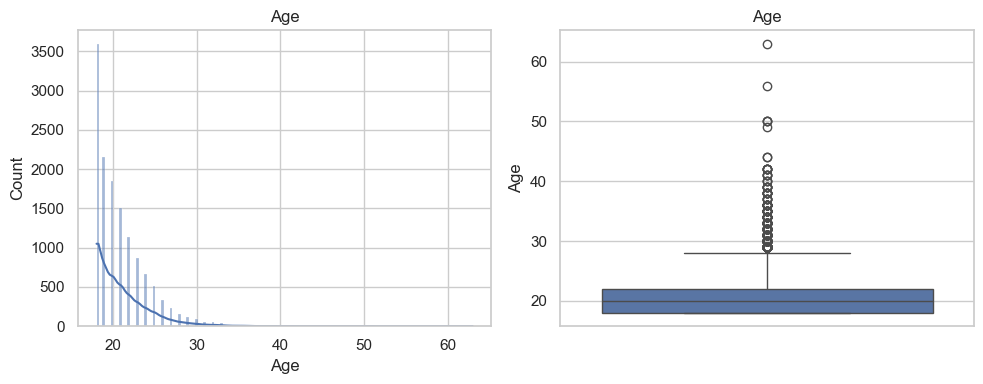

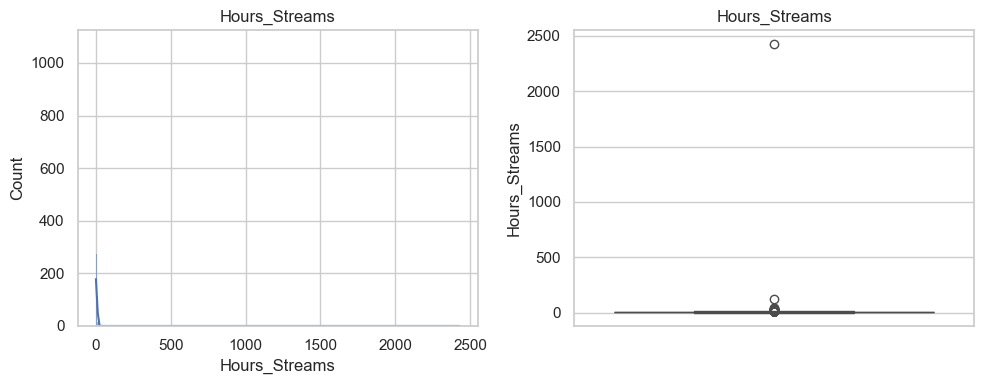

In [ ]:
#distribucio de les dades numèriques
for col in variables_numeriques:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Histograma
    sns.histplot(data[col], kde=True, ax=ax1)
    ax1.set_title(col)

    # Boxplot
    sns.boxplot(data=data[col].dropna(), ax=ax2)
    ax2.set_title(col)

    plt.tight_layout()
    plt.show()

In [ ]:
#Passem a NA totes les hores majors a 20
X_train.loc[X_train['Hours_Streams'] > 20, 'Hours_Streams'] = pd.NA

In [ ]:
'''import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Suponemos que X es tu DataFrame con datos numéricos
# Eliminar muestras con valores faltantes
X_clean = X_train[variables_numeriques].dropna()


model = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=1)

# Entrenar el modelo con datos limpios
model.fit(X_clean)

# Obtener los scores de anomalía (cuanto más alto, más anómalo)
scores = model.decision_function(X_clean)
# Los scores de anomalía son negativos; convertir a positivos para una interpretación más intuitiva
anomaly_scores = -scores

# Visualización de la distribución de scores de anomalía
sns.histplot(anomaly_scores, kde=True)
plt.title('Distribución de Scores de Anomalía')
plt.xlabel('Score de Anomalía')
plt.ylabel('Frecuencia')
plt.show()

# Calcular un threshold basado en un percentil
threshold = np.percentile(anomaly_scores, 95)
print("Threshold propuesto basado en el 95° percentil:", threshold)

# Clasificar como outliers basado en el threshold
is_outlier = anomaly_scores > threshold

# Añadir los resultados al DataFrame
X_clean['is_outlier'] = is_outlier

# Visualizar los resultados
print(X_clean[X_clean['is_outlier']])

# Opcional: Visualización con ACP si es útil
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reducir a dos dimensiones
components = pca.fit_transform(X_clean.drop('is_outlier', axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=is_outlier, cmap='coolwarm', alpha=0.6)
plt.title('Visualización de PCA de Outliers')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Outlier')
plt.show()'''


'import numpy as np\nimport pandas as pd\nfrom sklearn.ensemble import IsolationForest\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Suponemos que X es tu DataFrame con datos numéricos\n# Eliminar muestras con valores faltantes\nX_clean = X_train[variables_numeriques].dropna()\n\n\nmodel = IsolationForest(n_estimators=100, max_samples=\'auto\', contamination=\'auto\', random_state=1)\n\n# Entrenar el modelo con datos limpios\nmodel.fit(X_clean)\n\n# Obtener los scores de anomalía (cuanto más alto, más anómalo)\nscores = model.decision_function(X_clean)\n# Los scores de anomalía son negativos; convertir a positivos para una interpretación más intuitiva\nanomaly_scores = -scores\n\n# Visualización de la distribución de scores de anomalía\nsns.histplot(anomaly_scores, kde=True)\nplt.title(\'Distribución de Scores de Anomalía\')\nplt.xlabel(\'Score de Anomalía\')\nplt.ylabel(\'Frecuencia\')\nplt.show()\n\n# Calcular un threshold basado en un percentil\nthreshold = np.percent

In [ ]:
#Detectem els valors nuls
print('Valors nuls a les dades de train')
for col in X_train.columns:
    print(col, X_train[col].isnull().sum()) 
print('*' * 50)
print('Valors nuls a les dades de validació')
for col in X_val.columns:
    print(col, X_val[col].isnull().sum())
print('*' * 50)
print('Valors nuls a les dades de test')
for col in X_test.columns:
    print(col, X_test[col].isnull().sum())


Valors nuls a les dades de train
GADE 455
Game 0
earnings 0
whyplay 0
League 0
Narcissism 16
Gender 0
Age 0
Work 25
Degree 1103
Playstyle 0
SWL_T 0
SPIN_T 428
Regio_Residence 0
Regio_Birhtplace 0
Hours_Streams 99
**************************************************
Valors nuls a les dades de validació
GADE 131
Game 0
earnings 0
whyplay 0
League 0
Narcissism 4
Gender 0
Age 0
Work 9
Degree 311
Playstyle 0
SWL_T 0
SPIN_T 150
Regio_Residence 0
Regio_Birhtplace 0
Hours_Streams 17
**************************************************
Valors nuls a les dades de test
GADE 63
Game 0
earnings 0
whyplay 0
League 0
Narcissism 3
Gender 0
Age 0
Work 4
Degree 163
Playstyle 0
SWL_T 0
SPIN_T 72
Regio_Residence 0
Regio_Birhtplace 0
Hours_Streams 14


In [ ]:
#convertim les categòriques a numèriques amb label encoding
import pandas as pd
import numpy as np

def label_encoding(df):
    df = pd.DataFrame(df)  # Convertim a DataFrame si encara no ho és
    if 'GADE' in df.columns:
        df['GADE'].replace(['Not difficult at all','Somewhat difficult','Very difficult', 'Extremely difficult'], 
                           [1, 2, 3, 4], 
                           inplace=True)      
    if 'Game' in df.columns:
        df['Game'].replace(['League of Legends','Other', 'Starcraft 2', 'Counter Strike', 'World of Warcraft','Hearthstone','Diablo 3', 'Heroes of the Storm', 'Guild Wars 2', 'Skyrim', 'Destiny'], 
                           [1,2,3,4,5,6,7,8,9,10,11], 
                           inplace=True)
    if 'earnings' in df.columns:
        df['earnings'].replace(['fun', 'living', 'competition', 'isolation', 'UNKNOWN'], 
                               [1,2,3,4,np.nan], 
                               inplace=True)
    if 'whyplay' in df.columns:
        df['whyplay'].replace(['fun', 'living', 'competition', 'isolation', 'UNKNOWN'], 
                               [1,2,3,4,np.nan], 
                               inplace=True)
    if 'League' in df.columns:
        df['League'].replace(['Medium', 'Beginner', 'Professional', 'UNKNOWN'], 
                             [1,2,3,np.nan], 
                             inplace=True)
    if 'Gender' in df.columns:
        df['Gender'].replace(['Male' ,'Female', 'Other'], 
                             [1,2,3], 
                             inplace=True)
    if 'Work' in df.columns:
        df['Work'].replace(['Student at college / university', 'Employed', 'Student at school','Unemployed / between jobs'], 
                           [1,2,3,4], 
                           inplace=True)
    if 'Degree' in df.columns:
        df['Degree'].replace(['High school', 'Bachelor\xa0(or equivalent)','Master\xa0(or equivalent)','Ph.D., Psy.D., MD'], 
                             [1,2,3,4], 
                             inplace=True)
    if 'Playstyle' in df.columns:
        df['Playstyle'].replace(['Multiplayer online friends', 'Multiplayer online strangers', 'Singleplayer','Both', 'Offline', 'Watcher', 'UNKNOWN'], 
                                [1,2,3,4,5,6, np.nan], 
                                inplace=True)
    if 'SWL_T' in df.columns:
        df['SWL_T'].replace(['Slightly sat', 'Slightly diss', 'Neutral', 'Satisfied', 'Extremely sat', 'Dissatisfied', 'Extremely diss'], 
                            [1,2,3,4, 5, 6,7], 
                            inplace=True)
    if 'SPIN_T' in df.columns:
        df['SPIN_T'].replace(['NO', 'Mild', 'Moderate','Severe', 'Very severe'], 
                             [1,2,3,4,5], 
                             inplace=True)
    if 'Regio_Residence' in df.columns:
        df['Regio_Residence'].replace(['North America', 'Western Europe', 'Scandinavia and Baltic Countries', 'Southern Europe', 'Eastern and Balkan Europe', 'Southeast Asia', 'Nordic Countries', 'Other', 'Latin America', 'East Asia', 'Middle East and North Africa', 'Oceania', 'South Asia', 'Eastern Europe', 'Sub-Saharan Africa', 'Central America and Caribbean'], 
                                       [1,2,3,4, 5, 6,7,8, 9, 10, 11, 12, 13, 14, 15, 16], 
                                       inplace=True)
    if 'Regio_Birhtplace' in df.columns:
        df['Regio_Birhtplace'].replace(['North America', 'Western Europe', 'Scandinavia and Baltic Countries', 'Southern Europe', 'Eastern and Balkan Europe', 'Southeast Asia', 'Nordic Countries', 'Other', 'Latin America', 'East Asia', 'Middle East and North Africa', 'Oceania', 'South Asia', 'Eastern Europe', 'Sub-Saharan Africa', 'Central America and Caribbean'], 
                                        [1,2,3,4, 5, 6,7,8, 9, 10, 11, 12, 13, 14, 15, 16], 
                                        inplace=True)
    return df

X_train = label_encoding(X_train)
X_val = label_encoding(X_val)
X_test = label_encoding(X_test)




In [ ]:
#Convertim tots els missings que trobem a NA
data.replace(['null', 'NULL', 'Null', 'nan', 'NaN', 'NAN', 'Nan', 'None', 'none', 'NONE', '<NA>'], np.nan, inplace=True)

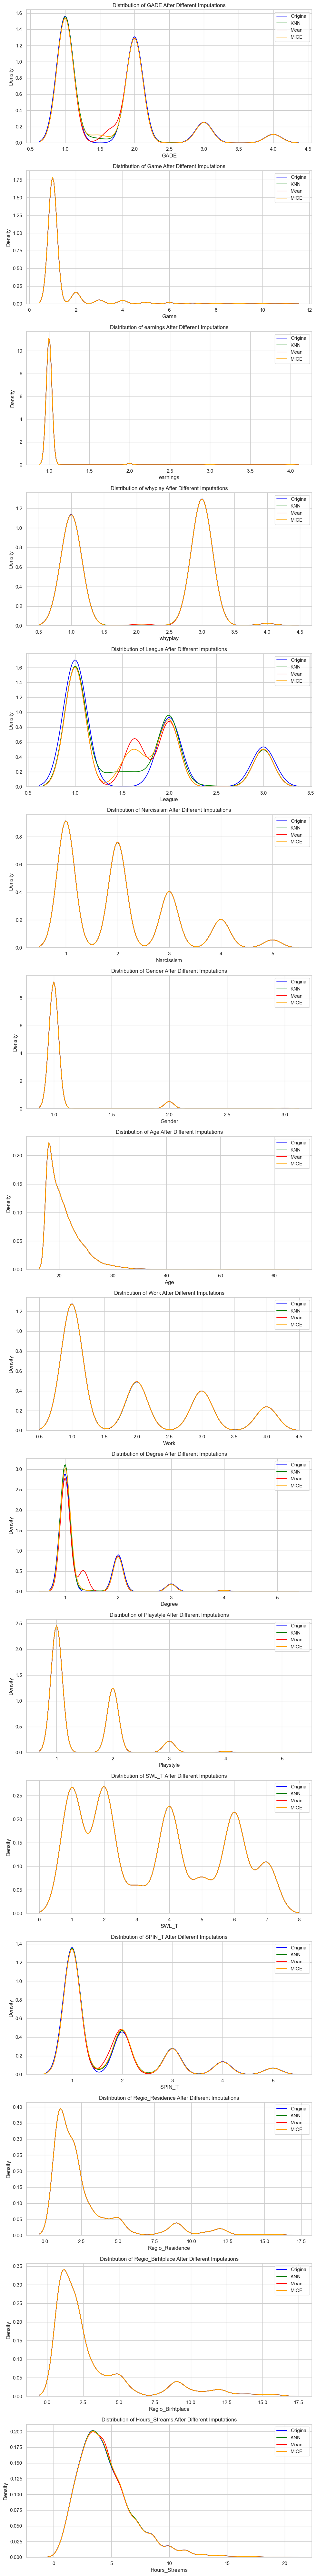

In [ ]:
from sklearn.experimental import enable_iterative_imputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer


# Assuming X_train is already loaded and pre-processed as described before
X_train = X_train.replace(pd.NA, np.nan).astype(float)

# Imputation setups
imputer_knn = KNNImputer(n_neighbors=5)
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_mice = IterativeImputer()

# Applying imputations
data_knn_imputed = imputer_knn.fit_transform(X_train)
data_mean_imputed = imputer_mean.fit_transform(X_train)
data_mice_imputed = imputer_mice.fit_transform(X_train)

# Convert imputed arrays back to DataFrame for easier manipulation
columns = X_train.columns
data_knn_imputed = pd.DataFrame(data_knn_imputed, columns=columns)
data_mean_imputed = pd.DataFrame(data_mean_imputed, columns=columns)
data_mice_imputed = pd.DataFrame(data_mice_imputed, columns=columns)

# Custom colors
colors = {
    "Original": "blue",
    "KNN": "green",
    "Mean": "red",
    "MICE": "orange"  # Changed color for better distinction
}

# Plotting
fig, axes = plt.subplots(nrows=len(columns), figsize=(10, 5 * len(columns)))
for i, col in enumerate(columns):
    sns.kdeplot(X_train[col], ax=axes[i], label='Original', fill=False, color=colors["Original"])
    sns.kdeplot(data_knn_imputed[col], ax=axes[i], label='KNN', fill=False, color=colors["KNN"])
    sns.kdeplot(data_mean_imputed[col], ax=axes[i], label='Mean', fill=False, color=colors["Mean"])
    sns.kdeplot(data_mice_imputed[col], ax=axes[i], label='MICE', fill=False, color=colors["MICE"])
    axes[i].set_title(f'Distribution of {col} After Different Imputations')
    axes[i].legend()

plt.tight_layout()
plt.show()




In [ ]:
#imputar el val i el train amb knn
X_train = data_knn_imputed
X_val = X_val.replace(pd.NA, np.nan).astype(float)
X_test = X_test.replace(pd.NA, np.nan).astype(float)
X_val = imputer_mean.transform(X_val)
X_test = imputer_mean.transform(X_test)

In [ ]:
'''
from imblearn.combine import SMOTETomek
def balance_smotetomek(df_train, y_train):

    df_train = pd.DataFrame(df_train, columns=df_train.columns)
    
    cat_features = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',  'Stage']
    
    for feature in cat_features:
        if feature in df_train.columns:
            df_train[feature] = df_train[feature].astype(int)
        
    y_train = y_train.astype(int)
   
    smt = SMOTETomek()
    
    balanced_data, y_train_balanced = smt.fit_resample(df_train, y_train)
    
    return balanced_data, y_train_balanced
'''


"\nfrom imblearn.combine import SMOTETomek\ndef balance_smotetomek(df_train, y_train):\n\n    df_train = pd.DataFrame(df_train, columns=df_train.columns)\n    \n    cat_features = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',  'Stage']\n    \n    for feature in cat_features:\n        if feature in df_train.columns:\n            df_train[feature] = df_train[feature].astype(int)\n        \n    y_train = y_train.astype(int)\n   \n    smt = SMOTETomek()\n    \n    balanced_data, y_train_balanced = smt.fit_resample(df_train, y_train)\n    \n    return balanced_data, y_train_balanced\n"

Age
count    13464.000000
mean        20.930407
std          3.300897
min         18.000000
25%         18.000000
50%         20.000000
75%         22.000000
max         63.000000
Name: Age, dtype: float64


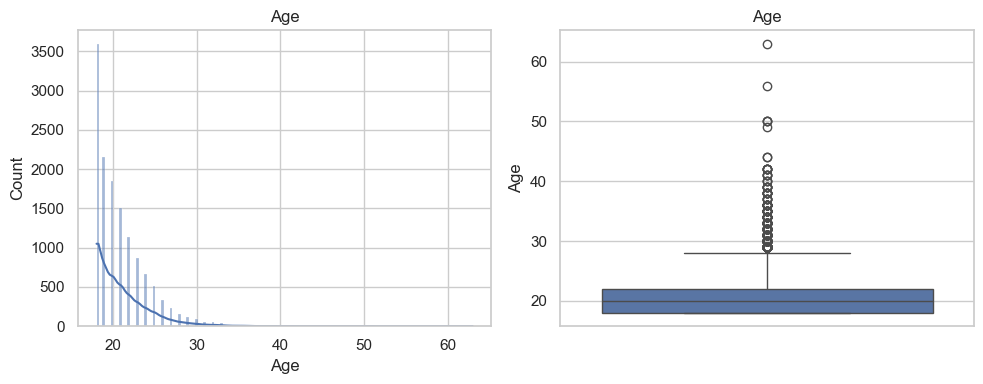

Hours_Streams
count    13344.000000
mean         4.780190
std         21.174287
min          0.000000
25%          2.857143
50%          4.142857
75%          5.714286
max       2428.714286
Name: Hours_Streams, dtype: float64


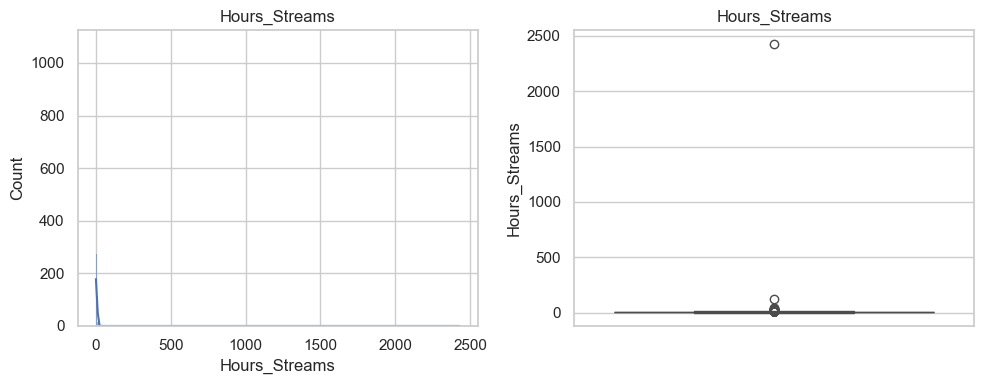

In [ ]:
for variable in variables_numeriques:
    print(variable)
    print(data[variable].describe())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Histograma
    sns.histplot(data[variable], kde=True, ax=ax1)
    ax1.set_title(variable)

    # Boxplot
    sns.boxplot(data=data[variable].dropna(), ax=ax2)
    ax2.set_title(variable)

    plt.tight_layout()
    plt.show()

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


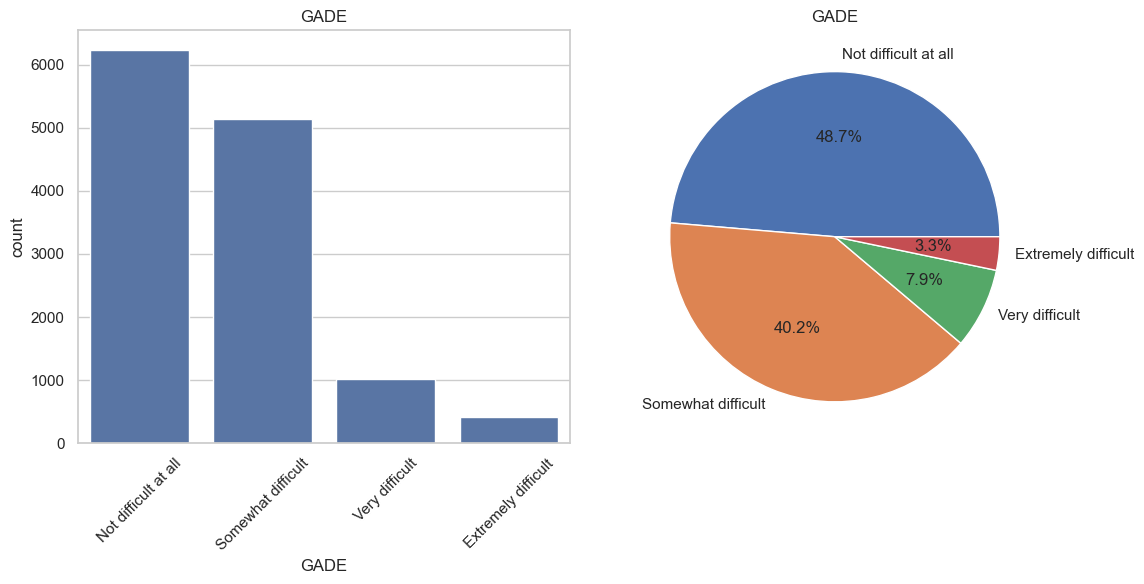

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


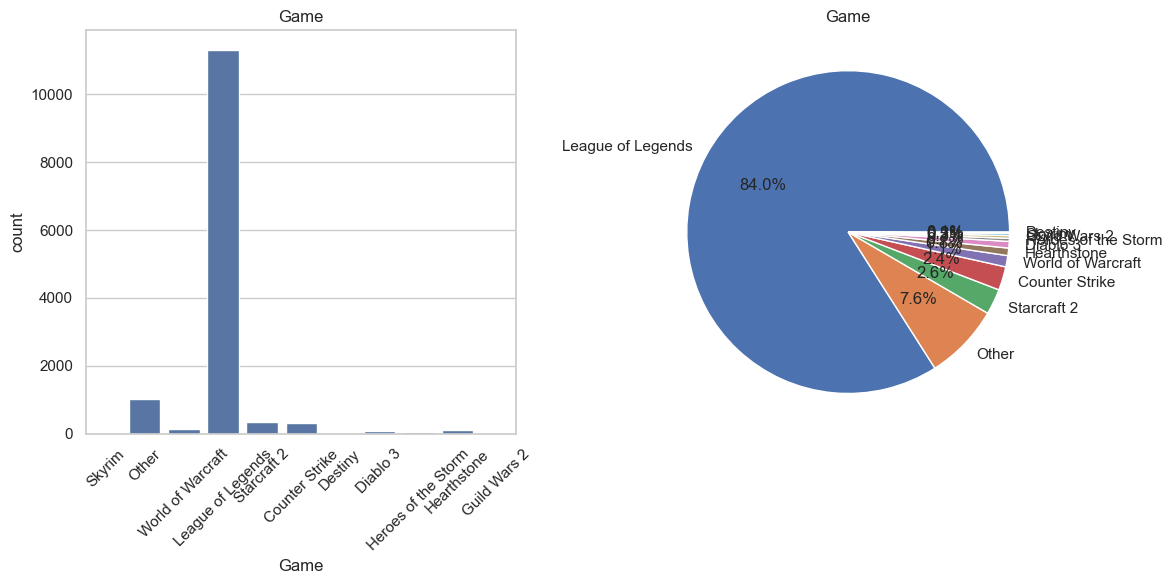

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


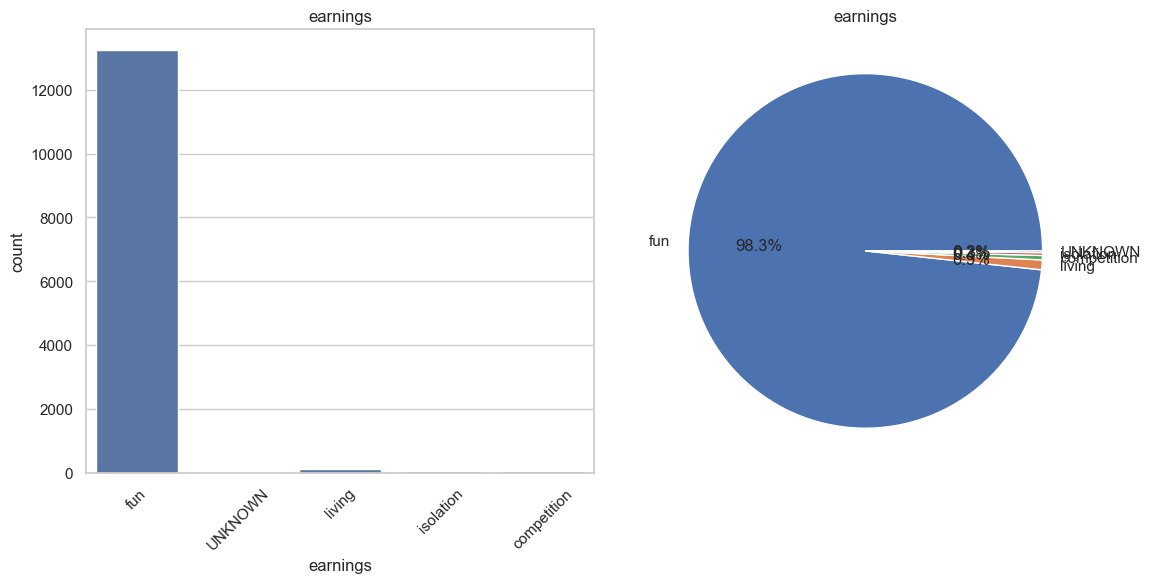

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


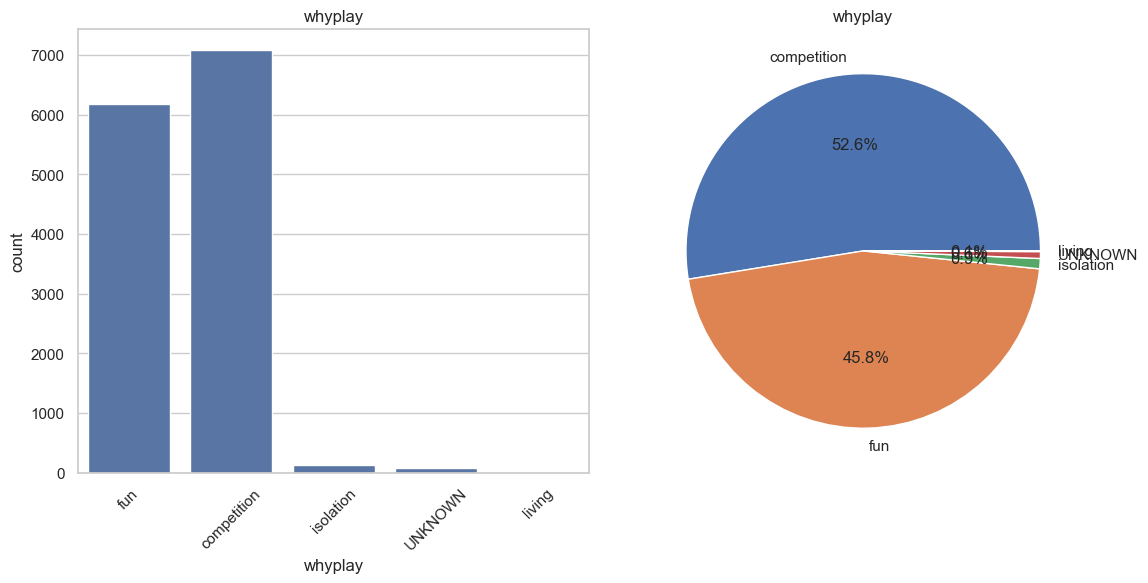

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


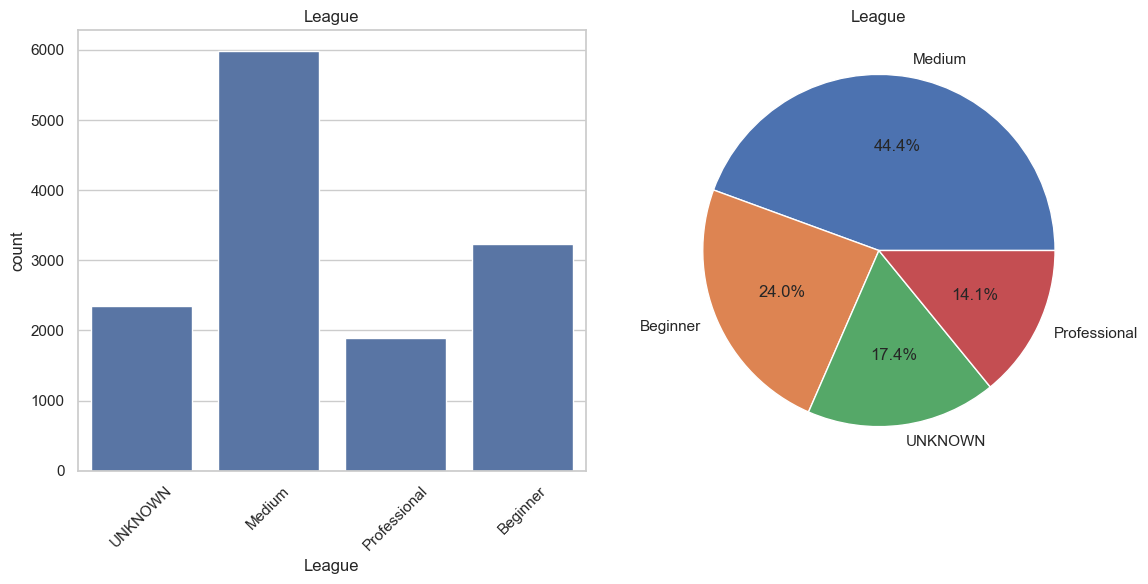

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


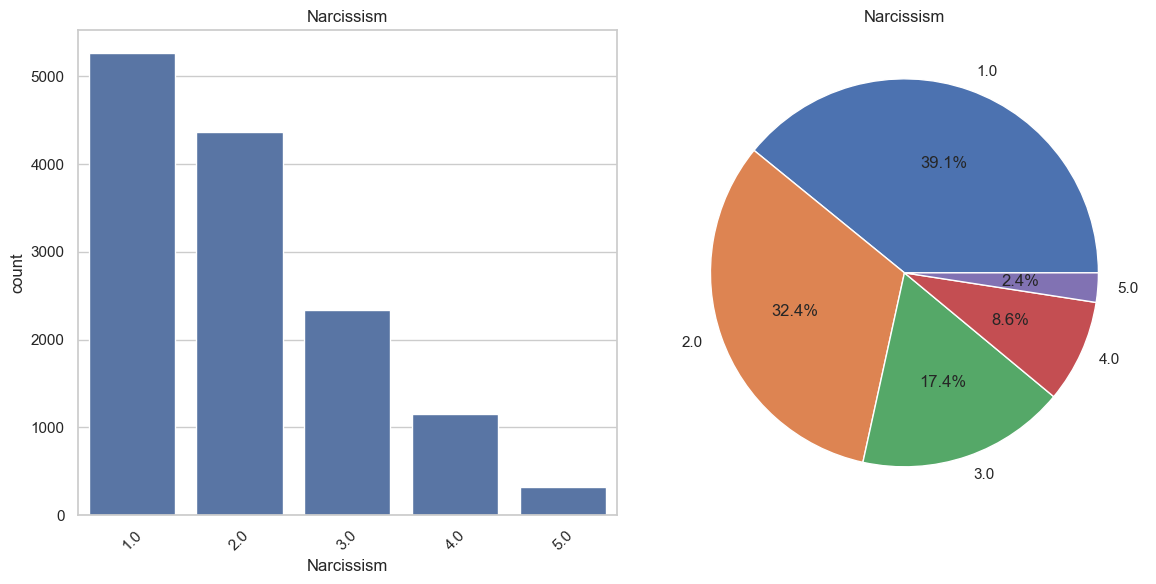

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


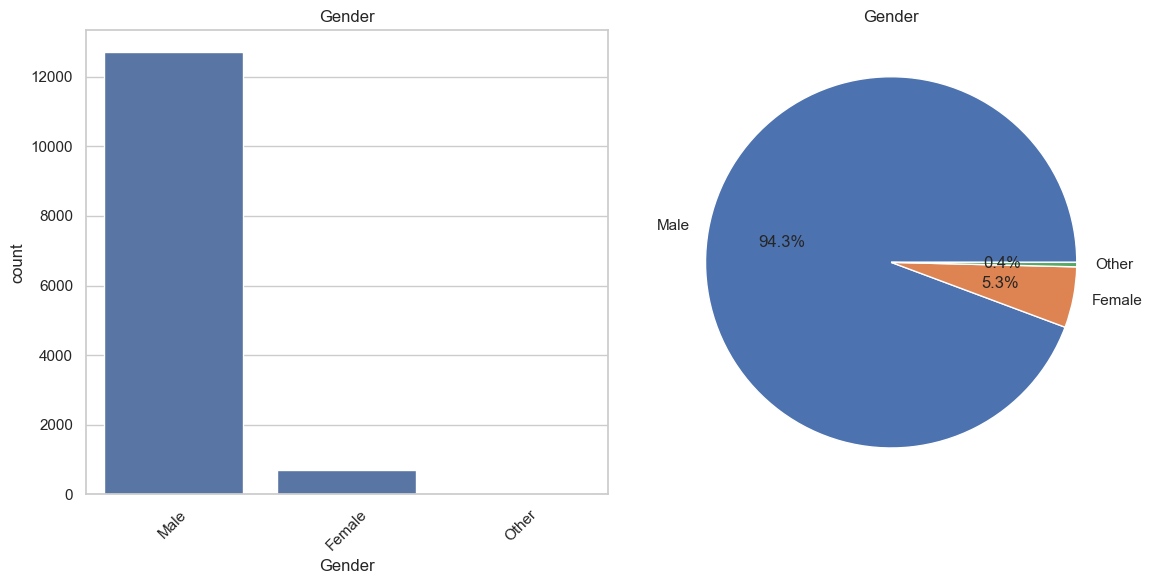

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


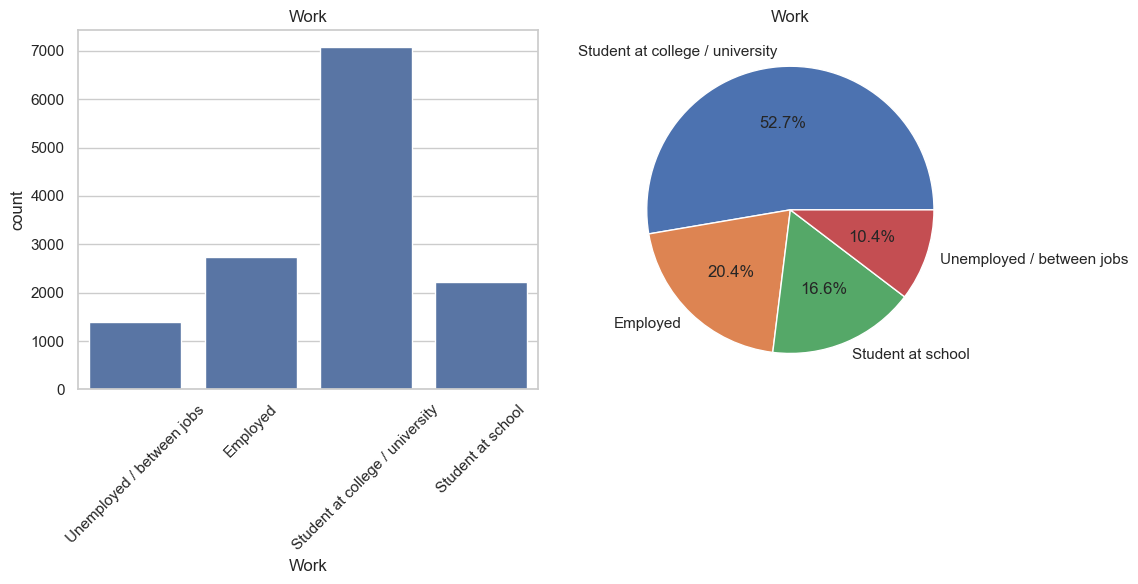

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


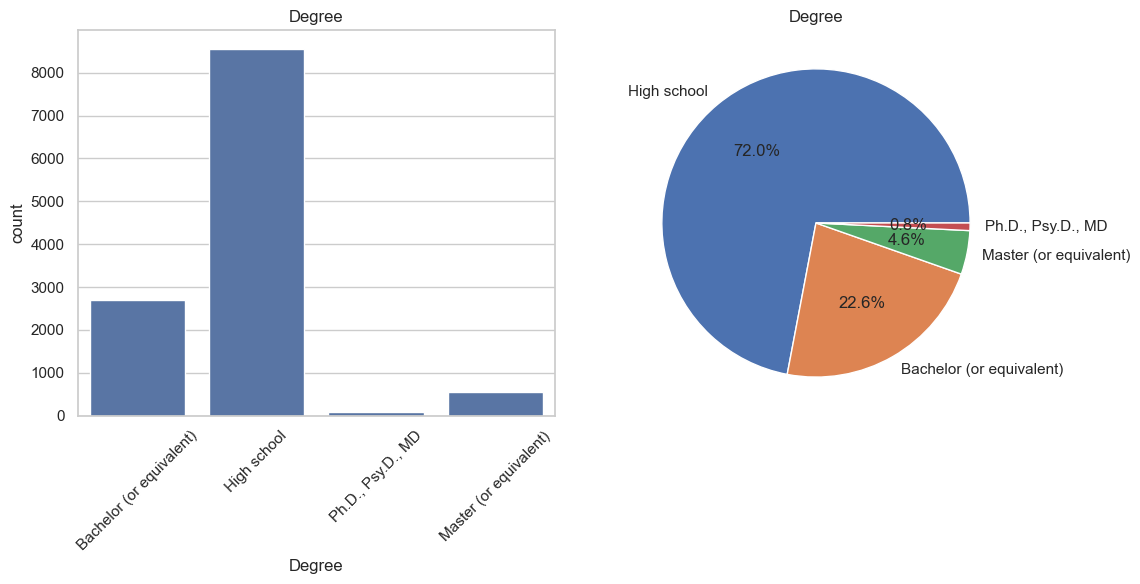

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


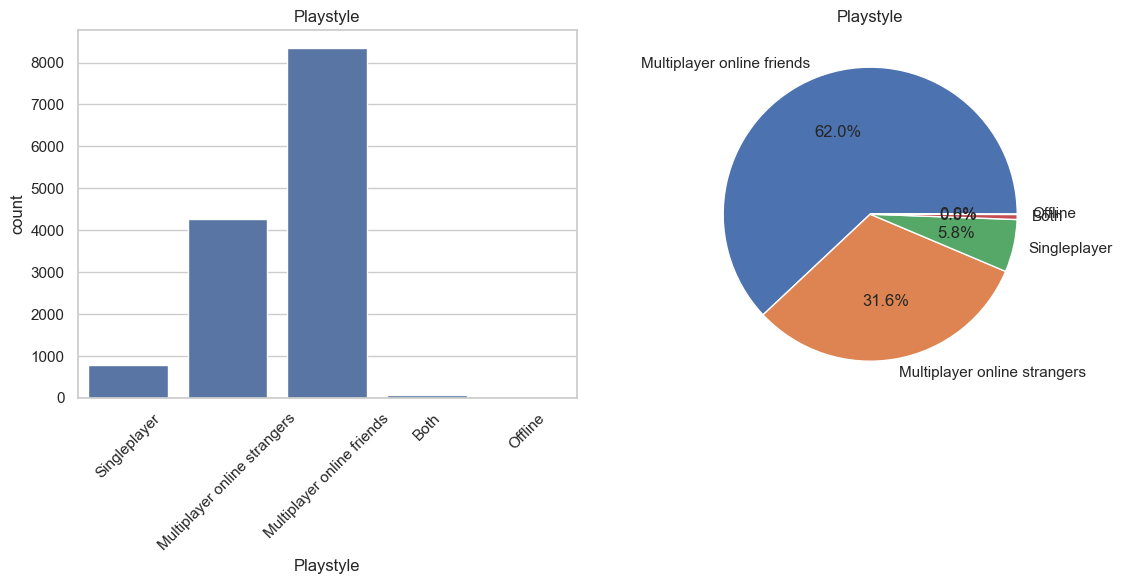

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


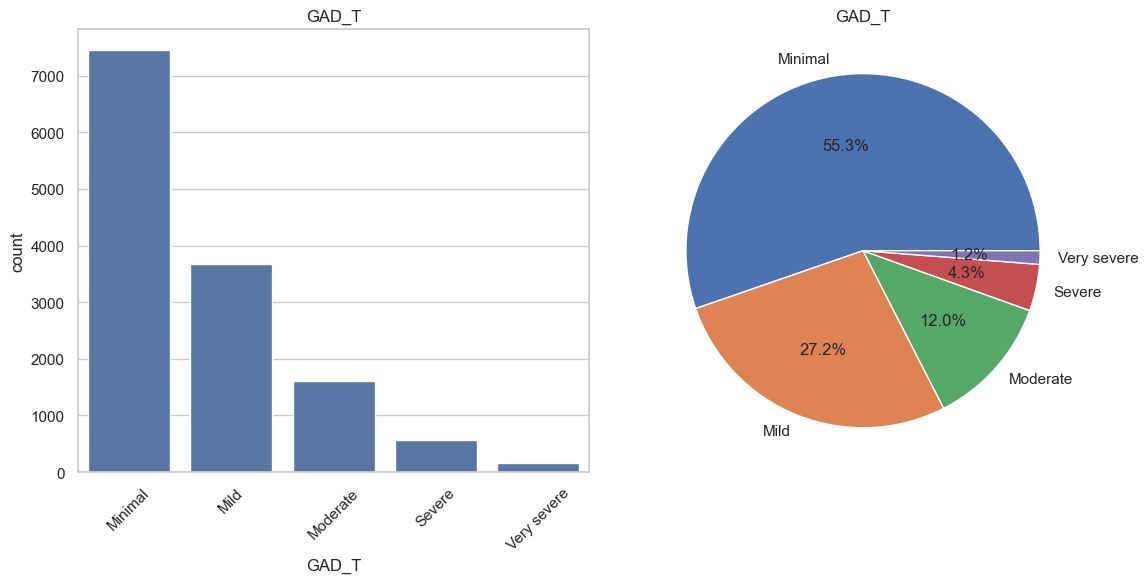

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


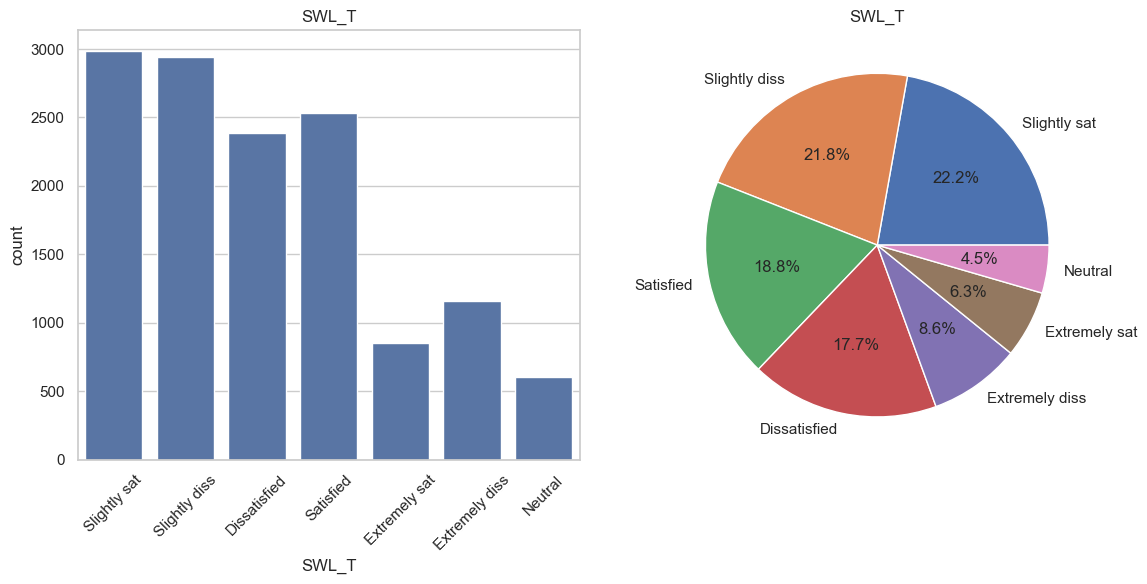

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


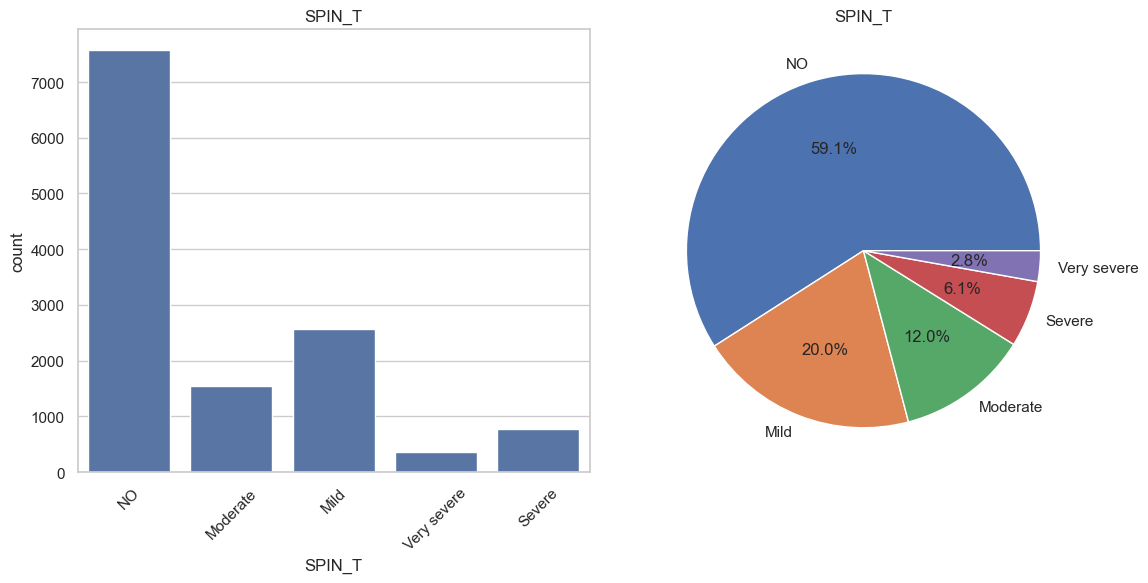

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


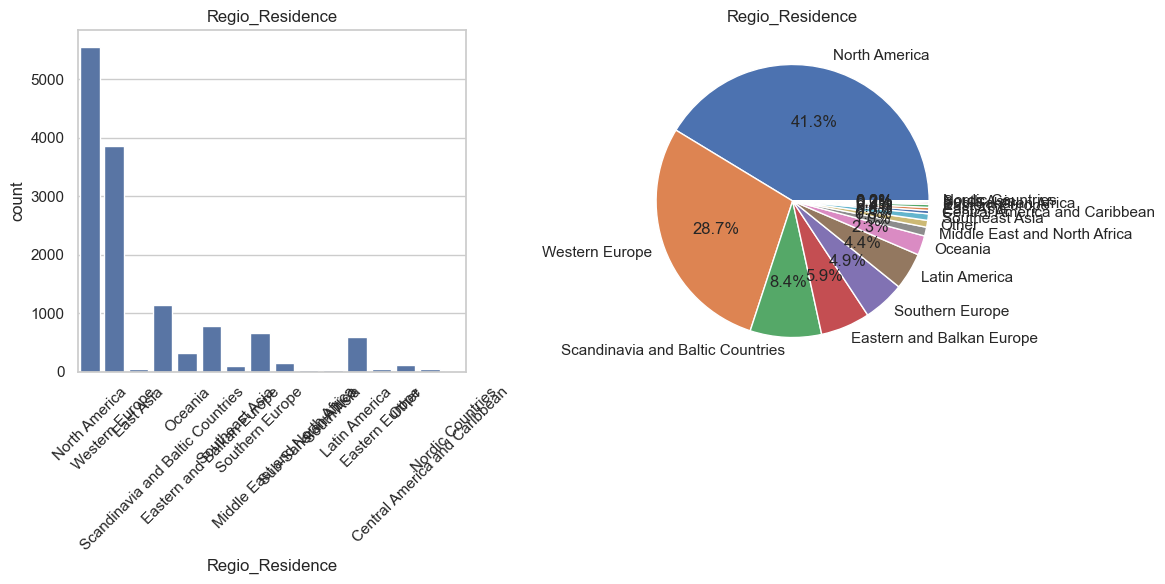

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


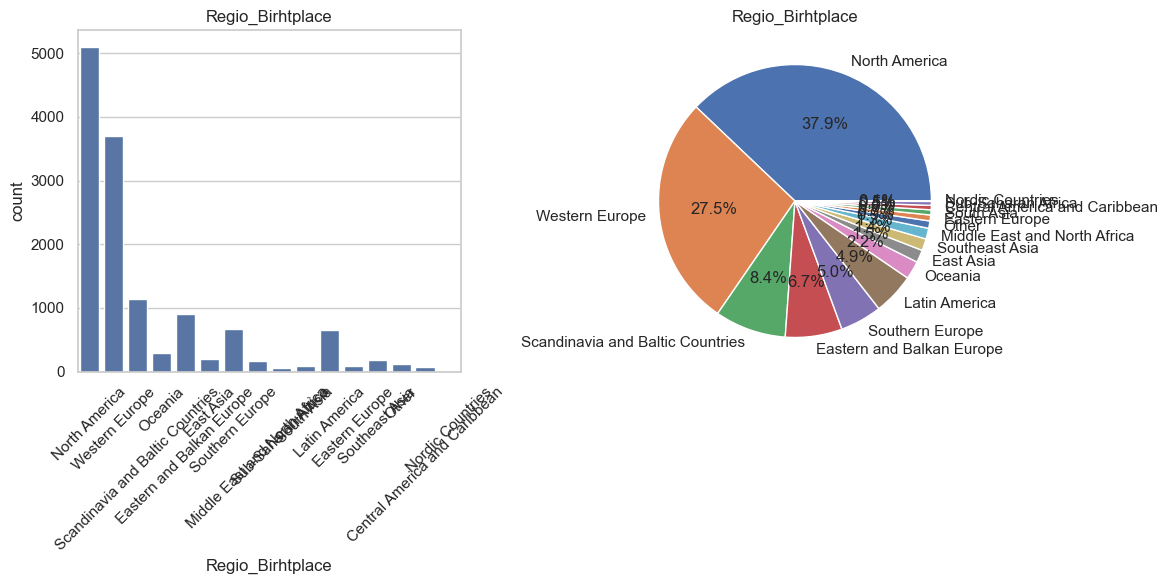

/var/folders/sw/_0s9qzt96w9362lcsy8drfbr0000gn/T/ipykernel_5322/3318360027.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x


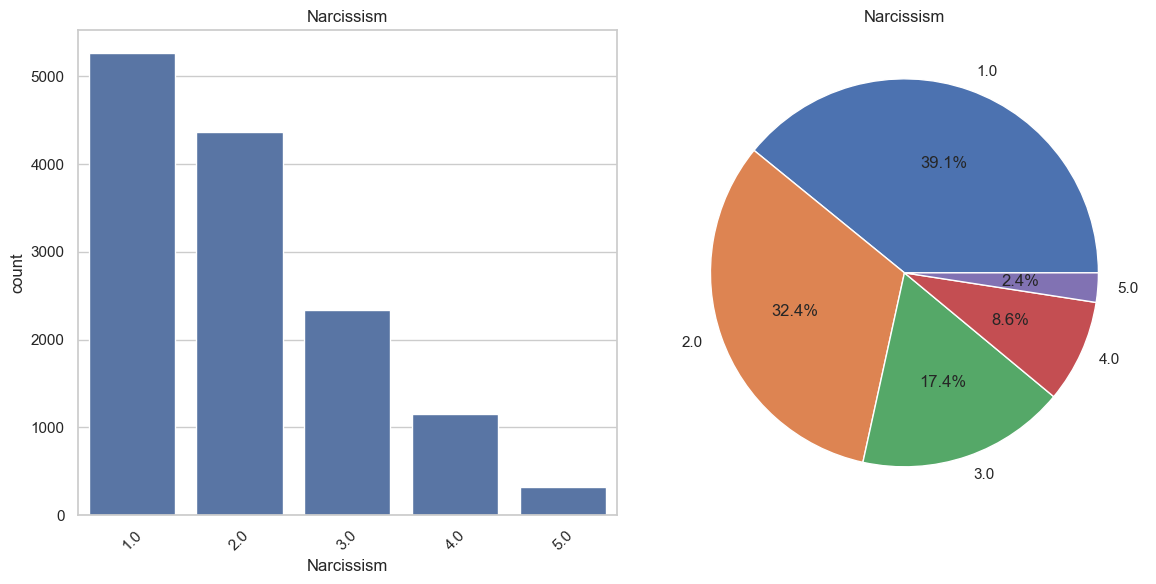

In [ ]:
for variable in variables_categoriques:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Countplot
    sns.countplot(data=data, x=variable, ax=ax1)
    ax1.set_title(variable)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje x

    # Pieplot
    data[variable].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2)
    ax2.set_title(variable)
    ax2.set_ylabel('')  # Eliminar la etiqueta del eje y en el gráfico de pastel

    plt.tight_layout()
    plt.show()


In [ ]:
#fer una llista amb les variables numèriques = totes
variables_numeriques = []
for i in X_train.columns:
    variables_numeriques.append(i)

In [ ]:
#study_correlation_numerical_variables(X_train, variables_numeriques, ['GAD_T'])
#study_correlation_numerical_variables(data, variables_numeriques, ['GAD_T'])

RESAMPLING
CAL REFER EL ONE LABLE PER INTERPRETAR?
NORMALITZAR? QUAN?

In [ ]:
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Assuming X_train is your feature DataFrame and y_train are the labels

# Check data types
print(X_train.dtypes)

# Identify categorical columns - adjust the condition as necessary
categorical_cols = X_train.columns[X_train.dtypes == object].tolist()
numeric_cols = X_train.columns[X_train.dtypes != object].tolist()

# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values
    ('scaler', StandardScaler())  # Scale data
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical data to one-hot vectors
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a full pipeline with the preprocessor and the logistic regression model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=1))])

# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_train_pred = clf.predict(X_train)

# Evaluation
print("Classification report for training data:")
print(classification_report(y_train, y_train_pred))

# If you need to process validation data:
y_val_pred = clf.predict(X_val)
print("Classification report for validation data:")
print(classification_report(y_val, y_val_pred))
'''


'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.linear_model import LogisticRegression\n\n# Assuming X_train is your feature DataFrame and y_train are the labels\n\n# Check data types\nprint(X_train.dtypes)\n\n# Identify categorical columns - adjust the condition as necessary\ncategorical_cols = X_train.columns[X_train.dtypes == object].tolist()\nnumeric_cols = X_train.columns[X_train.dtypes != object].tolist()\n\n# Pipeline for numeric features\nnumeric_transformer = Pipeline(steps=[\n    (\'imputer\', SimpleImputer(strategy=\'median\')),  # Impute missing values\n    (\'scaler\', StandardScaler())  # Scale data\n])\n\n# Pipeline for categorical features\ncategorical_transformer = Pipeline(steps=[\n    (\'imputer\', SimpleImputer(strategy=\'constant\', fill_value=\'missing\')),  # Imput

# REGRESSIÓ LOGÍSTICA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc


In [ ]:
logreg = LogisticRegression()


In [ ]:
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], }  # Example values for regularization strength C


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear']
              }


grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


/Users/gibertantentas/.pyenv/versions/3.11.5/envs/IAA/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gibertantentas/.pyenv/versions/3.11.5/envs/IAA/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
grid_search.best_params_ = {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

Best parameters: {'C': 10, 'penalty': 'l2'}
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'} millor 
Best parameters: {'C': 100, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Best parameters: {'C': 100, 'max_iter': 300, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}



In [ ]:
X_train_cop = X_train.copy()
X_test_cop = X_test.copy()
X_val_cop = X_val.copy()
y_train_cop = y_train.copy()
y_test_cop = y_test.copy()
y_val_cop = y_val.copy()

In [ ]:
best_params = grid_search.best_params_


In [ ]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)


/Users/gibertantentas/.pyenv/versions/3.11.5/envs/IAA/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/Users/gibertantentas/.pyenv/versions/3.11.5/envs/IAA/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


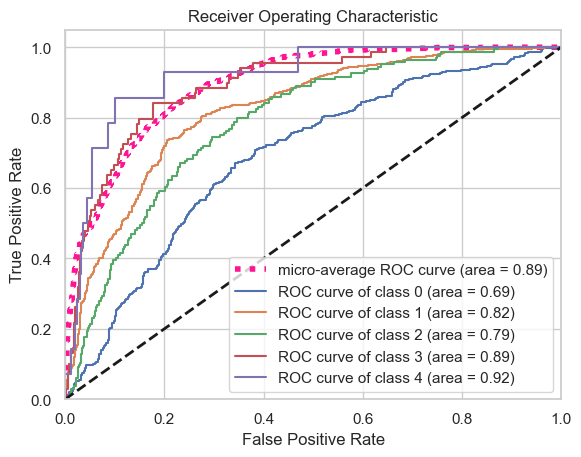

In [ ]:
from sklearn.preprocessing import label_binarize

# Convert the test labels to one-hot encoded format
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Predict probabilities for each class
y_pred_proba = best_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class and micro-average ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:", best_params)


Test Accuracy: 0.615441722345954
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


# PERCEPTRÓ MULTICAPA

In [ ]:
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training Accuracy')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation Accuracy')
  axes[1].set_title('Training and Validation Accuracy')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

In [ ]:
#Type of variable
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_train.columns)
y_train = pd.DataFrame(y_train, columns=['GAD_T'])
y_test = pd.DataFrame(y_test, columns=['GAD_T'])

In [ ]:
'''X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
'''

'X_train = np.array(X_train)\nX_test = np.array(X_test)\ny_train = np.array(y_train)\ny_test = np.array(y_test)\n'

In [ ]:
X_train.columns

Index(['GADE', 'Game', 'earnings', 'whyplay', 'League', 'Narcissism', 'Gender',
       'Age', 'Work', 'Degree', 'Playstyle', 'SWL_T', 'SPIN_T',
       'Regio_Residence', 'Regio_Birhtplace', 'Hours_Streams'],
      dtype='object')

In [ ]:
y_train

GAD_T
7127   Moderate
4436       Mild
10306   Minimal
4763    Minimal
897        Mild
...         ...
5237    Minimal
12443    Severe
10971    Severe
11161      Mild
10251    Severe

[9424 rows x 1 columns]

In [ ]:
import pandas as pd

# Extract the specific column from the DataFrame
y_train_column = y_train['GAD_T']

# Create a Series from the extracted column
y_train_series = pd.Series(y_train_column)
print(y_train_series)

# Now you can perform boolean indexing using iloc
data.loc[y_train_series.iloc[y_train_series.values == 'Minimal'].index, 'GAD_T'] = 0
data.loc[y_train_series.iloc[y_train_series.values == 'Mild'].index, 'GAD_T'] = 1
data.loc[y_train_series.iloc[y_train_series.values == 'Moderate'].index, 'GAD_T'] = 2
data.loc[y_train_series.iloc[y_train_series.values == 'Severe'].index, 'GAD_T'] = 3
data.loc[y_train_series.iloc[y_train_series.values == 'Very severe'].index, 'GAD_T'] = 4



In [ ]:
import pandas as pd

# Assuming y_test is a DataFrame
y_test_column = y_test['GAD_T']
y_test_series = pd.Series(y_test_column)

# Now you can perform boolean indexing using iloc
data.loc[y_test_series.iloc[y_test_series.values == 'Minimal'].index, 'GAD_T'] = 0
data.loc[y_test_series.iloc[y_test_series.values == 'Mild'].index, 'GAD_T'] = 1
data.loc[y_test_series.iloc[y_test_series.values == 'Moderate'].index, 'GAD_T'] = 2
data.loc[y_test_series.iloc[y_test_series.values == 'Severe'].index, 'GAD_T'] = 3
data.loc[y_test_series.iloc[y_test_series.values == 'Very severe'].index, 'GAD_T'] = 4



In [ ]:
import simpleaudio as sa
import numpy as np
import random

def notify_execution():
    for _ in range(3):
        frequency = random.randint(10, 10000)  # Hz
        duration = 2  # milliseconds


        samples = (np.sin(2 * np.pi * np.arange(44100 * duration / 1000) * frequency / 44100)).astype(np.float32)
        wave_obj = sa.WaveObject(samples, 1, 2, 44100)
        play_obj = wave_obj.play()
        play_obj.wait_done()



In [ ]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout



# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
y_train = pd.DataFrame(y_train, columns=['GAD_T'])
y_test = pd.DataFrame(y_test, columns=['GAD_T'])'''

label_mapping = {'Minimal': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Very severe': 4}
y_train_int = np.array([label_mapping[label] for label in y_train['GAD_T']])
y_test_int = np.array([label_mapping[label] for label in y_test['GAD_T']])

model = Sequential([
    Dense(5, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(500, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

# Define the optimizer and learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
#optimizer = SGD(learning_rate=learning_rate)


# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 1000
batch_size = 16
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#history = model.fit(X_train_scaled, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2, callbacks=[early_stopping])
history = model.fit(X_train_scaled, y_train_int, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2, callbacks=[early_stopping])


# Evaluate the model
#loss, accuracy = model.evaluate(X_test_scaled, y_test)
loss, accuracy = model.evaluate(X_test_scaled, y_test_int)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot leaning curves
plot_curves(history)
notify_execution()

Epoch 1/1000
531/531 - 3s - loss: 1.1118 - accuracy: 0.5486 - val_loss: 1.0502 - val_accuracy: 0.5599 - 3s/epoch - 5ms/step
Epoch 2/1000


KeyboardInterrupt: 